# **ASSIGNMENT 3: STOCK PRICE PREDICTION USING RNNs**
####by : Sakshi Vishwakarma, 1934902

This code has been divided into 3 sections.
1. Data Cleaning and Preprocessing
   - checking for datatype
   - checking for data info
   - checking for duplictes
   - selecting a section for training
   - sorting data to make it sequential and resetting index
   - plotting simple graphs for visualization


---
2. Data Preperation (time-series/sequential) for Reccurent Models
   - function to create time series data using sliding window technique,using size window size= 30
   - function to prepare data for models
   - Split into training and validation sets (85-15 %)
   - visualizing each of the price 'Open', 'Close', 'High’, 'Low'


---
3. Model Training and Experiment
  - Vanilla RNN
  - LSTM
  - GRU




In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adagrad, Nadam, Adam, SGD, RMSprop
from tensorflow.keras.layers import (
    GRU, LSTM, SimpleRNN, Dense, Dropout, BatchNormalization, Input
)
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, backend as K
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


In [3]:
train_file_path = '/content/drive/My Drive/stock_model/train.csv'
train_data = pd.read_csv(train_file_path)
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


## **1. Data Cleaning and Prepocessing**

In [4]:
# checking the datatypes
train_data.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [5]:
#checking for info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [6]:
#checking for duplicates
print("\nNumber of duplicate rows in the training data:", train_data.duplicated().sum())


Number of duplicate rows in the training data: 0


In [7]:
# Converting 'Date' column to datetime using the correct format
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%Y-%m-%d')

# Filtering data for dates starting from 2017
train_data = train_data[train_data['Date'] >= '2020-01-01']
train_data.reset_index(drop=True, inplace=True)
print(train_data.head())


        Date       Open       High        Low      Close  Adj Close    Volume
0 2020-01-02  67.420502  68.433998  67.324501  68.433998  68.433998  27278000
1 2020-01-03  67.400002  68.687500  67.365997  68.075996  68.075996  23408000
2 2020-01-06  67.581497  69.916000  67.550003  69.890503  69.890503  46768000
3 2020-01-07  70.023003  70.175003  69.578003  69.755501  69.755501  34330000
4 2020-01-08  69.740997  70.592499  69.631500  70.251999  70.251999  35314000


In [8]:
#sorting the data based on date to make sure it is sequential
train_data.sort_values(by='Date', inplace=True)
train_data.tail()

<ipython-input-8-c5c436f42fd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='Date', inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
751,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
752,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
753,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
754,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
755,2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [9]:
train_data.index = train_data.pop('Date')
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200


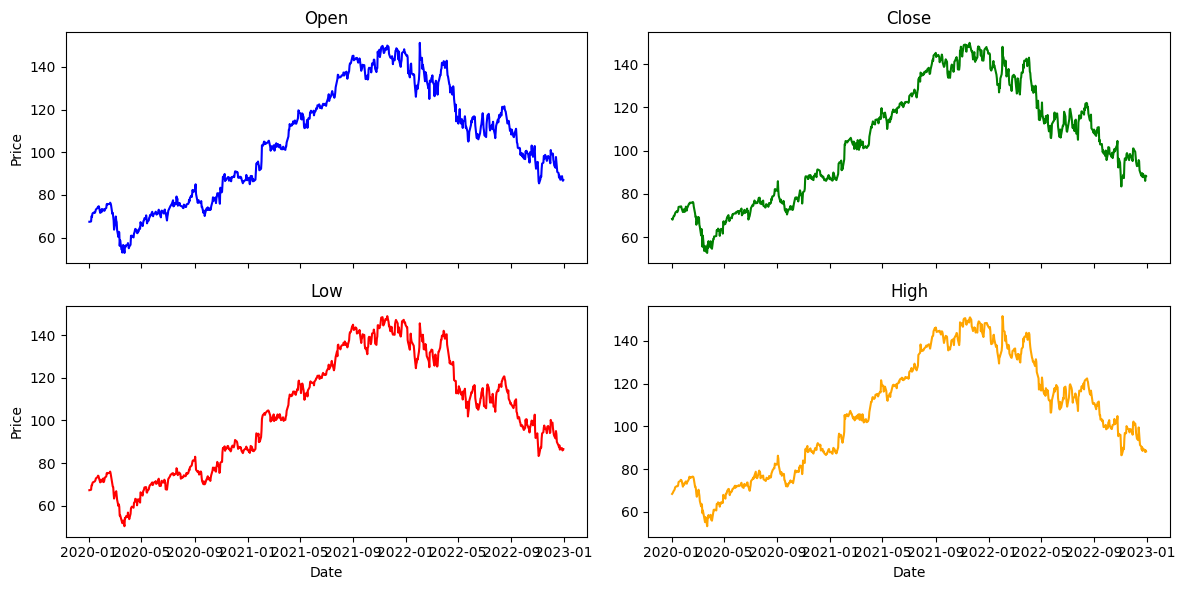

In [10]:
# creating simple graphs to plot the trends
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

# Plotting 'Open'
axes[0, 0].plot(train_data.index, train_data['Open'], color='blue')
axes[0, 0].set_title('Open')
axes[0, 0].set_ylabel('Price')

# Plotting 'Close'
axes[0, 1].plot(train_data.index, train_data['Close'], color='green')
axes[0, 1].set_title('Close')

# Plotting 'Low'
axes[1, 0].plot(train_data.index, train_data['Low'], color='red')
axes[1, 0].set_title('Low')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_xlabel('Date')

# Plotting 'High'
axes[1, 1].plot(train_data.index, train_data['High'], color='orange')
axes[1, 1].set_title('High')
axes[1, 1].set_xlabel('Date')

plt.tight_layout()
plt.show()


## **2. Data Preperation (time-series/sequential) for Reccurent Models**

In [11]:
# function to create time series data using sliding window technique,using size window size= 30
def create_windowed_data(dataframe, window_size=30):

    target_dates = []
    feature_sequences, target_values = [], []

    for i in range(window_size, len(dataframe)):
        feature_sequence = dataframe.iloc[i - window_size:i][['Open', 'High', 'Low', 'Close']].to_numpy()
        target_value = dataframe.iloc[i][['Open', 'High', 'Low', 'Close']].to_numpy()

        target_dates.append(dataframe.index[i])
        feature_sequences.append(feature_sequence)
        target_values.append(target_value)

    return pd.DataFrame({
        'Target Date': target_dates,
        'Features': feature_sequences,
        'Targets': target_values
    })


In [12]:
windowed_df = create_windowed_data(train_data, window_size=30)
windowed_df


,Target Date,Features,Targets
0,2020-02-14,"[[67.420502, 68.433998, 67.324501, 68.433998],...","[75.726501, 76.002502, 75.277496, 75.936501]"
1,2020-02-18,"[[67.400002, 68.6875, 67.365997, 68.075996], [...","[75.717003, 76.528, 75.550499, 75.972]"
2,2020-02-19,"[[67.581497, 69.916, 67.550003, 69.890503], [7...","[76.360001, 76.537003, 76.049004, 76.2435]"
3,2020-02-20,"[[70.023003, 70.175003, 69.578003, 69.755501],...","[75.9505, 76.3535, 75.212997, 75.849503]"
4,2020-02-21,"[[69.740997, 70.592499, 69.6315, 70.251999], [...","[75.228996, 75.547501, 73.9245, 74.172997]"
...,...,...,...
721,2022-12-23,"[[92.25, 94.389999, 91.610001, 93.940002], [94...","[87.110001, 89.550003, 87.07, 89.230003]"
722,2022-12-27,"[[94.690002, 96.93, 93.919998, 96.410004], [95...","[88.800003, 88.940002, 87.010002, 87.389999]"
723,2022-12-28,"[[95.089996, 96.790001, 94.510002, 95.699997],...","[86.980003, 88.040001, 85.940002, 86.019997]"
724,2022-12-29,"[[98.260002, 100.139999, 96.709999, 98.440002]...","[86.620003, 88.849998, 86.610001, 88.449997]"


In [13]:
# function to prepare data for models
def process_windowed_data(windowed_dataframe):
    dates = windowed_dataframe['Target Date'].values
    X = np.array(windowed_dataframe['Features'].tolist())  # Shape: (samples, 30, 4 features)
    Y = np.array(windowed_dataframe['Targets'].tolist())  # Shape: (samples, 4 targets)
    return dates, X, Y
dates, X, y = process_windowed_data(windowed_df)


In [14]:
dates.shape, X.shape, y.shape

((726,), (726, 30, 4), (726, 4))

In [15]:
# Splitting into training and validation sets (85-15 %)
split_index = int(len(dates) * 0.85)
dates_train, X_train, y_train = dates[:split_index], X[:split_index], y[:split_index]
dates_val, X_val, y_val = dates[split_index:], X[split_index:], y[split_index:]


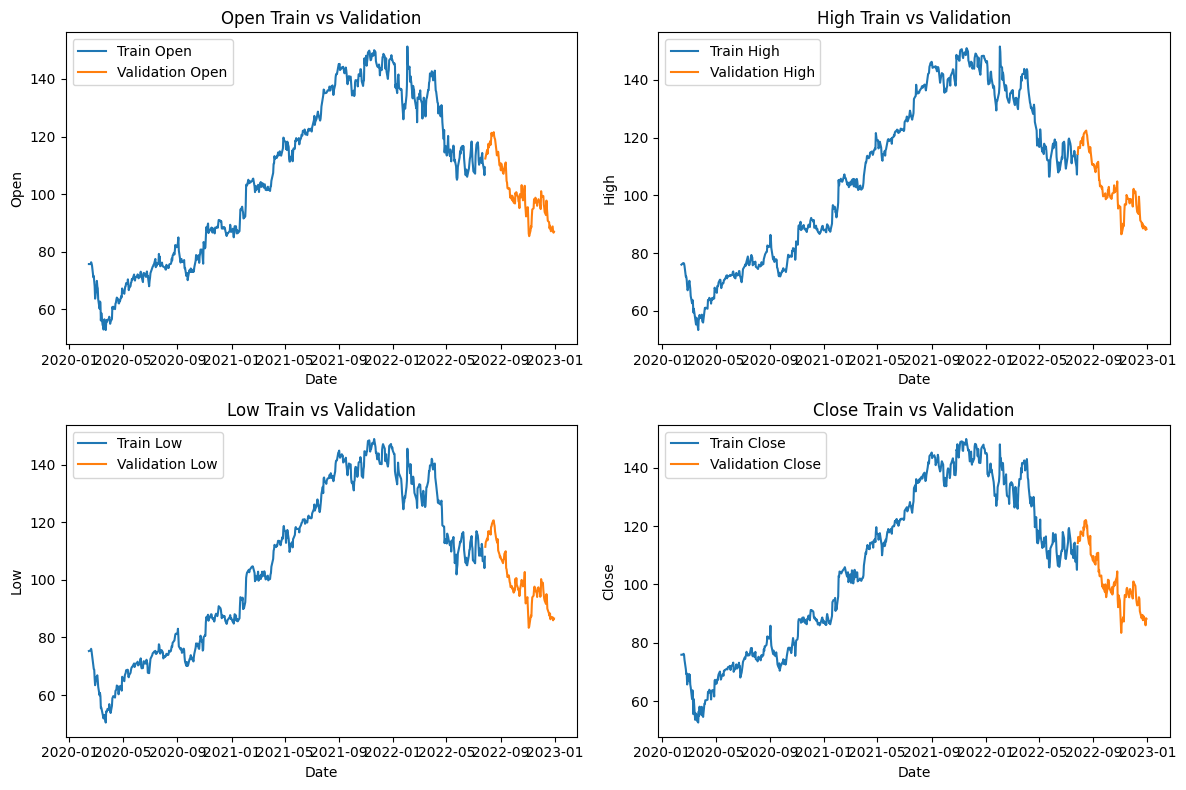

In [16]:
# visualizing each of the price 'Open', 'Close', 'High' , 'Low'
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns):
    ax[i//2, i%2].plot(dates_train, y_train[:, i], label=f'Train {col}')
    ax[i//2, i%2].plot(dates_val, y_val[:, i], label=f'Validation {col}')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'{col} Train vs Validation')
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel(col)

plt.tight_layout()
plt.show()

## **3. Model Training and Experimentation**

In [19]:
#simple function to get values of metrics at end of excecution
def print_metrics(history):
    print("Training and Validation Metrics after all epochs:")
    print(f"Final Train MAE: {history.history['mean_absolute_error'][-1]}")
    print(f"Final Train MSE: {history.history['mean_squared_error'][-1]}")

    print(f"Final Validation MAE: {history.history['val_mean_absolute_error'][-1]}")
    print(f"Final Validation MSE: {history.history['val_mean_squared_error'][-1]}")


In [20]:
#simple function to get the loss curves after each exceution cycle
def plot_training_validation_loss(history):

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting the training loss
    axes[0].plot(train_loss, label='Training Loss', color='blue')
    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting the validation loss
    axes[1].plot(val_loss, label='Validation Loss', color='red')
    axes[1].set_title('Validation Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    # Displaying the plots
    plt.tight_layout()
    plt.show()

### **1. Vanilla RNN**

In [ ]:
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
])

####**Pass 1: Optimizers**
Trying to get to know that which optimizer suits the study the best.
Expermenting with Adam, RMSprop ans Adgrad with their default Learning Rate and 50 number of epochs each.

In [ ]:
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
    ])
#Adam
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 3468.8704 - mean_absolute_error: 44.1721 - mean_squared_error: 3468.8704 - val_loss: 58.6717 - val_mean_absolute_error: 6.6709 - val_mean_squared_error: 58.6717
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.2567 - mean_absolute_error: 6.3521 - mean_squared_error: 64.2567 - val_loss: 29.0470 - val_mean_absolute_error: 4.5362 - val_mean_squared_error: 29.0470
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.1361 - mean_absolute_error: 3.5106 - mean_squared_error: 20.1361 - val_loss: 13.4727 - val_mean_absolute_error: 2.9899 - val_mean_squared_error: 13.4727
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4537 - mean_absolute_error: 2.4826 - mean_squared_error: 10.4537 - val_loss: 11.3351 - val_mean_absolute_error: 2.7635 - val_mean_squared_error: 11.3351
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0550 - mean_absolute_error: 2.4318 - mean_squared_error: 10.0550 - val_lo

In [ ]:
# RMSprop Optimizer
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
    ])

optimizer = RMSprop(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3350.9521 - mean_absolute_error: 35.3140 - mean_squared_error: 3350.9521 - val_loss: 202.4908 - val_mean_absolute_error: 12.9398 - val_mean_squared_error: 202.4908
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 247.8821 - mean_absolute_error: 14.1484 - mean_squared_error: 247.8821 - val_loss: 149.8608 - val_mean_absolute_error: 10.7095 - val_mean_squared_error: 149.8608
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 182.2042 - mean_absolute_error: 11.5688 - mean_squared_error: 182.2042 - val_loss: 108.5900 - val_mean_absolute_error: 9.6800 - val_mean_squared_error: 108.5900
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 154.6305 - mean_absolute_error: 11.0155 - mean_squared_error: 154.6305 - val_loss: 31.2924 - val_mean_absolute_error: 4.7269 - val_mean_squared_error: 31.2924
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 125.2104 - mean_absolute_error: 8.3284 - mean_squared_error

In [ ]:
#Adgard
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
    ])

optimizer = Adagrad(learning_rate=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7232.7319 - mean_absolute_error: 61.0932 - mean_squared_error: 7232.7319 - val_loss: 39.8356 - val_mean_absolute_error: 5.5547 - val_mean_squared_error: 39.8356
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.5752 - mean_absolute_error: 3.8356 - mean_squared_error: 22.5752 - val_loss: 14.8751 - val_mean_absolute_error: 3.1225 - val_mean_squared_error: 14.8751
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.2787 - mean_absolute_error: 2.2613 - mean_squared_error: 9.2787 - val_loss: 11.5977 - val_mean_absolute_error: 2.6875 - val_mean_squared_error: 11.5977
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8981 - mean_absolute_error: 2.3161 - mean_squared_error: 8.8981 - val_loss: 39.7414 - val_mean_absolute_error: 5.5401 - val_mean_squared_error: 39.7414
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.5606 - mean_absolute_error: 3.0813 - mean_squared_error: 16.5606 - val_loss: 

#### **Pass 2:**
As per the above results, we are continuing with Adam, checking the variations in results for different numbers of epoch

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 4015.7158 - mean_absolute_error: 51.0231 - mean_squared_error: 4015.7158 - val_loss: 203.4940 - val_mean_absolute_error: 11.8595 - val_mean_squared_error: 203.4940
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 101.8887 - mean_absolute_error: 7.5394 - mean_squared_error: 101.8887 - val_loss: 26.4135 - val_mean_absolute_error: 4.1646 - val_mean_squared_error: 26.4135
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.2515 - mean_absolute_error: 3.2659 - mean_squared_error: 17.2515 - val_loss: 12.1130 - val_mean_absolute_error: 2.7954 - val_mean_squared_error: 12.1130
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.8503 - mean_absolute_error: 2.5267 - mean_squared_error: 10.8503 - val_loss: 13.1882 - val_mean_absolute_error: 2.9391 - val_mean_squared_error: 13.1882
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0181 - mean_absolute_error: 2.2579 - mean_squared_error: 9.0181 - val

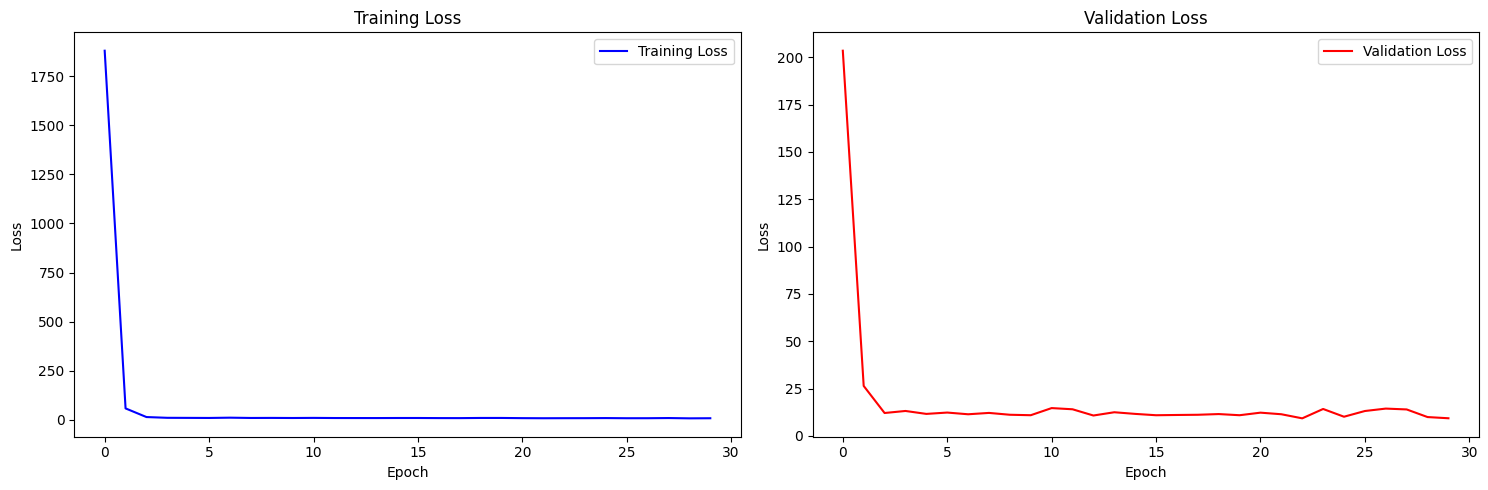

In [ ]:
#Trying with 30 epochs
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7039.6938 - mean_absolute_error: 65.1429 - mean_squared_error: 7039.6938 - val_loss: 103.6470 - val_mean_absolute_error: 8.2120 - val_mean_squared_error: 103.6470
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 92.6434 - mean_absolute_error: 7.2870 - mean_squared_error: 92.6434 - val_loss: 19.3729 - val_mean_absolute_error: 3.6053 - val_mean_squared_error: 19.3729
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.7341 - mean_absolute_error: 3.1751 - mean_squared_error: 16.7341 - val_loss: 15.9013 - val_mean_absolute_error: 3.2350 - val_mean_squared_error: 15.9013
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.3516 - mean_absolute_error: 2.5348 - mean_squared_error: 11.3516 - val_loss: 13.5052 - val_mean_absolute_error: 2.9682 - val_mean_squared_error: 13.5052
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.3169 - mean_absolute_error: 2.4524 - mean_squared_error: 11.3169 - val_

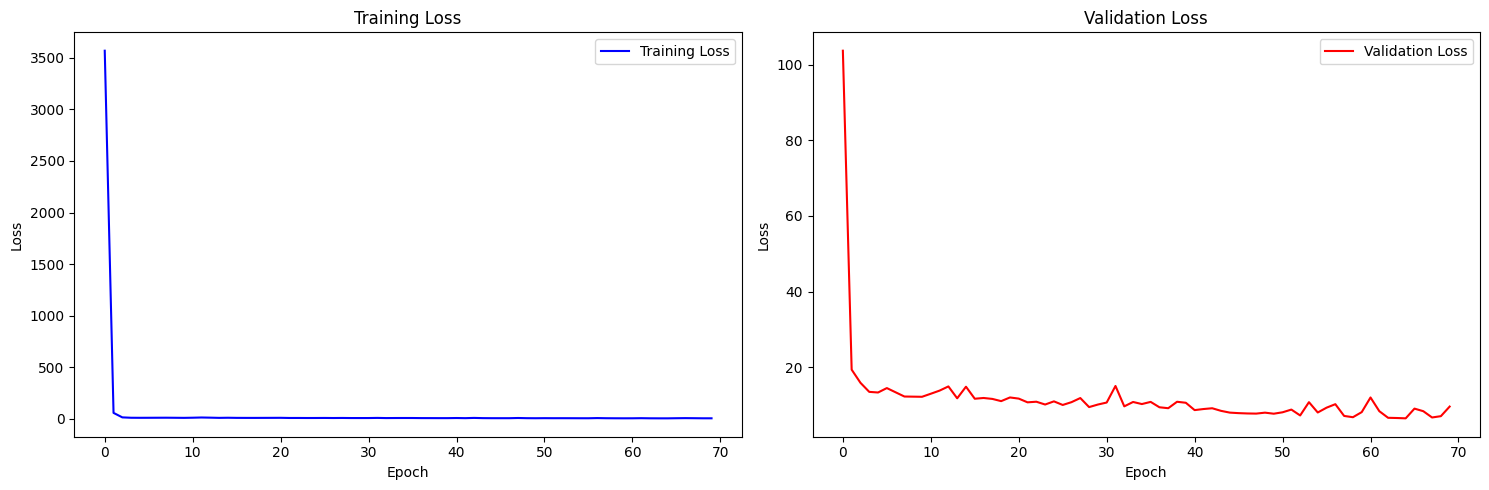

In [ ]:
#trying with differet number of epochs : 70
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(64, activation='relu'),
    layers.Dense(4)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70)
print_metrics(history)
plot_training_validation_loss(history)

#### **Pass 3**
After deciding with Adam and selecting number of epochs = 50,
The anlysis was done on the loss values of train and val , which indicated fluctuation and gaps indicating the potential for overfitting.

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 2342.1619 - mean_absolute_error: 31.0451 - mean_squared_error: 2340.7710 - val_loss: 71.4657 - val_mean_absolute_error: 7.1287 - val_mean_squared_error: 70.1863
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47.5148 - mean_absolute_error: 5.3448 - mean_squared_error: 46.2674 - val_loss: 15.4939 - val_mean_absolute_error: 3.1463 - val_mean_squared_error: 14.3362
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 16.6336 - mean_absolute_error: 3.0017 - mean_squared_error: 15.5011 - val_loss: 15.6644 - val_mean_absolute_error: 3.1734 - val_mean_squared_error: 14.6023
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2009 - mean_absolute_error: 2.5413 - mean_squared_error: 11.1585 - val_loss: 13.7929 - val_mean_absolute_error: 2.9505 - val_mean_squared_error: 12.8056
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2760 - mean_absolute_error: 2.5683 - mean_squared_error: 11.3041 - val_lo

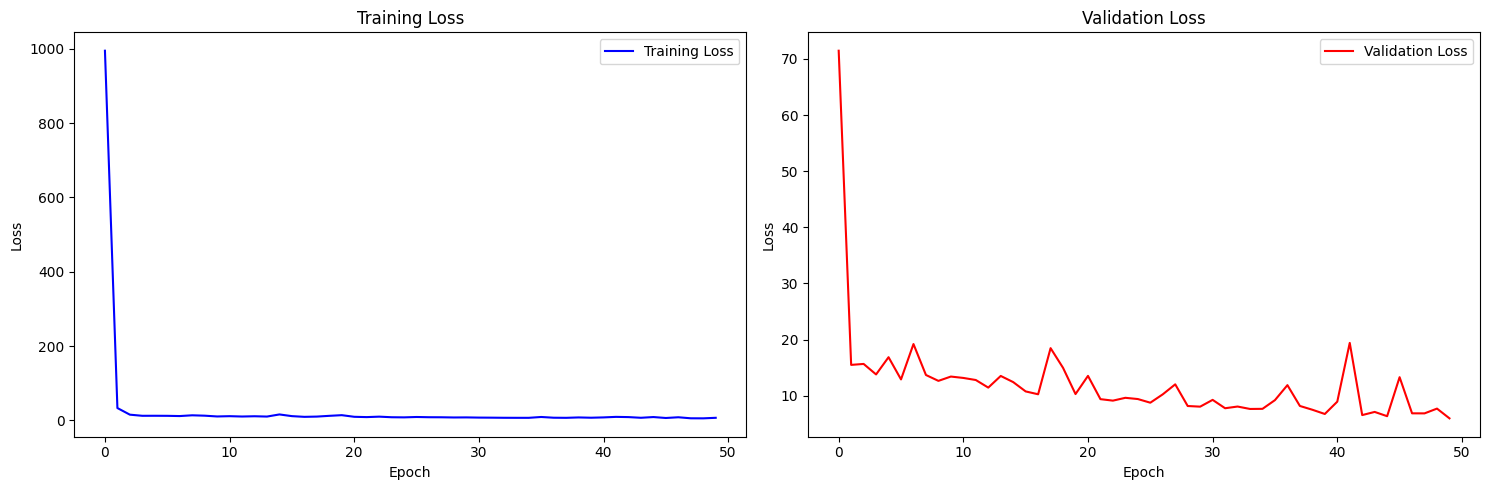

In [ ]:
# Reducing overfitting : 1. Regularizers
model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)),
    layers.SimpleRNN(64, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(4, kernel_regularizer=l2(0.01))
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 11676.3311 - mean_absolute_error: 89.8175 - mean_squared_error: 11674.9570 - val_loss: 355.7829 - val_mean_absolute_error: 14.2578 - val_mean_squared_error: 354.5211
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 196.3354 - mean_absolute_error: 10.5347 - mean_squared_error: 195.1055 - val_loss: 45.1757 - val_mean_absolute_error: 5.4873 - val_mean_squared_error: 44.0346
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.4161 - mean_absolute_error: 4.0156 - mean_squared_error: 27.2995 - val_loss: 17.3736 - val_mean_absolute_error: 3.2922 - val_mean_squared_error: 16.3251
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.6449 - mean_absolute_error: 2.8469 - mean_squared_error: 13.6151 - val_loss: 15.1618 - val_mean_absolute_error: 3.1514 - val_mean_squared_error: 14.1838
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.4407 - mean_absolute_error: 2.4569 - mean_squared_error: 10.4769 

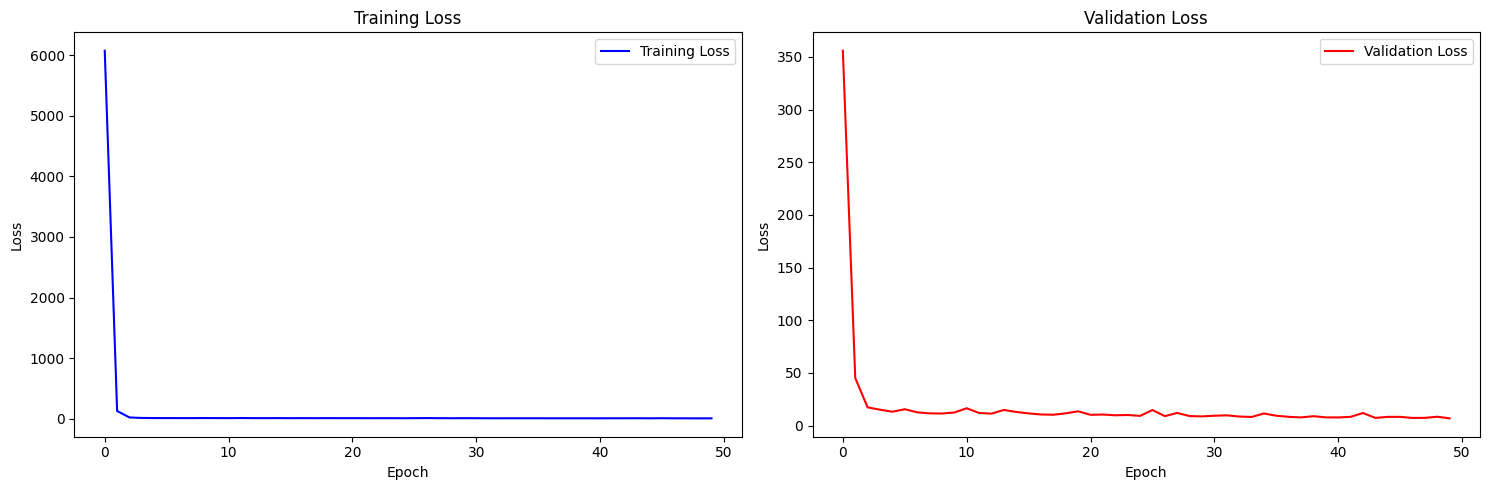

In [ ]:
# Reducing overfitting : 2. batchsize to 32
from tensorflow.keras.regularizers import l2

model = Sequential([
    layers.Input((30, 4)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)),
    layers.SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)),
    layers.SimpleRNN(64, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(4, kernel_regularizer=l2(0.01))
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Test MSE for Open: 6.16927528101424
Test MAE for Open: 1.8388895679575163
Test MSE for High: 7.335548922781735
Test MAE for High: 2.04409967569483
Test MSE for Low: 4.711428607299349
Test MAE for Low: 1.7449877023039968
Test MSE for Close: 8.670287376328334
Test MAE for Close: 2.327845159620437


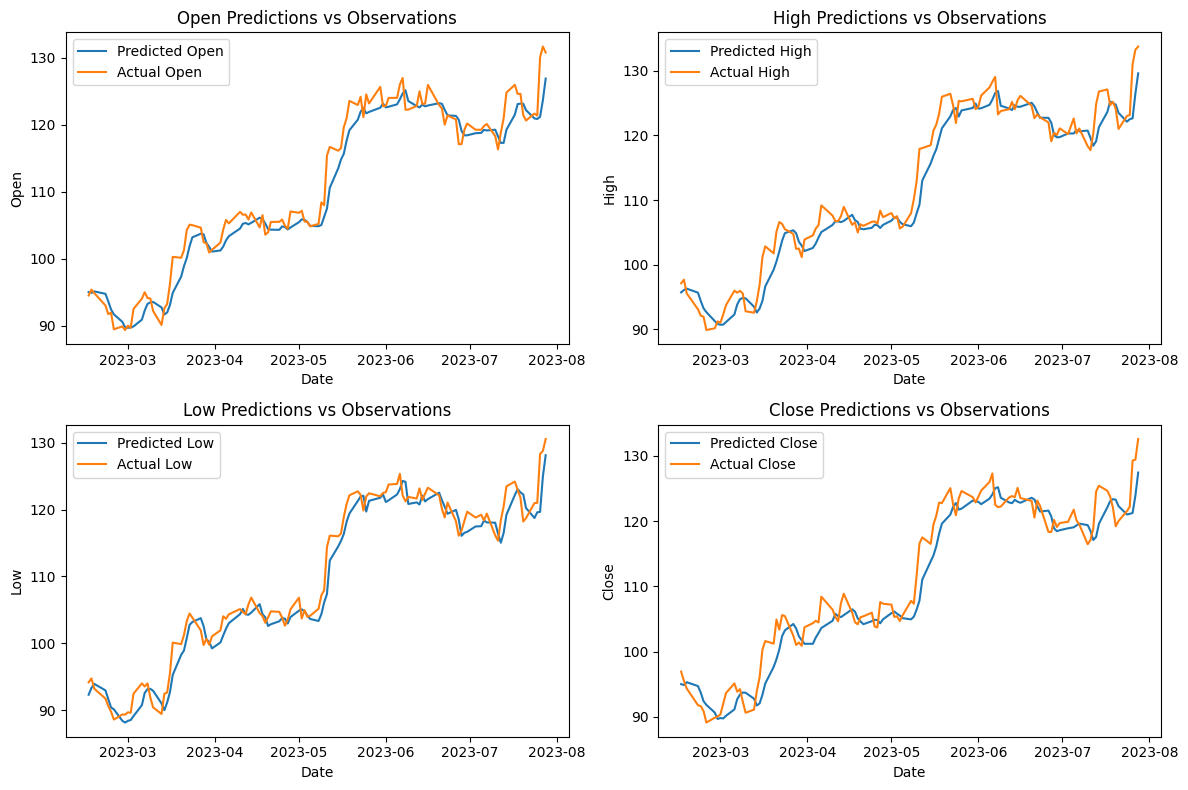

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_file_path = '/content/drive/My Drive/stock_model/test.csv'
test_data = pd.read_csv(test_file_path)

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y-%m-%d')
test_data.set_index('Date', inplace=True)
test_data.sort_index(inplace=True)
test_data = test_data[['Open', 'High', 'Low', 'Close']]


test_windowed_df = create_windowed_data(test_data)
test_dates, X_test, y_test = process_windowed_data(test_windowed_df)

test_predictions = model.predict(X_test)

columns = ['Open', 'High', 'Low', 'Close']
test_mse = mean_squared_error(y_test, test_predictions, multioutput='raw_values')
test_mae = mean_absolute_error(y_test, test_predictions, multioutput='raw_values')

for i, col in enumerate(columns):
    print(f"Test MSE for {col}: {test_mse[i]}")
    print(f"Test MAE for {col}: {test_mae[i]}")

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    ax[i//2, i%2].plot(test_dates, test_predictions[:, i], label=f'Predicted {col}')
    ax[i//2, i%2].plot(test_dates, y_test[:, i], label=f'Actual {col}')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'{col} Predictions vs Observations')
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel(col)

plt.tight_layout()
plt.show()


### **2. Long Short Term Memory (LSTM)**


In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(y_train.shape[1])
])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 11730.7148 - mean_absolute_error: 104.6492 - mean_squared_error: 11730.7148 - val_loss: 9864.0449 - val_mean_absolute_error: 98.8326 - val_mean_squared_error: 9864.0449
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 11660.9248 - mean_absolute_error: 104.3314 - mean_squared_error: 11660.9248 - val_loss: 9442.2480 - val_mean_absolute_error: 96.6685 - val_mean_squared_error: 9442.2480
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 11159.4004 - mean_absolute_error: 101.8565 - mean_squared_error: 11159.4004 - val_loss: 9153.3145 - val_mean_absolute_error: 95.1614 - val_mean_squared_error: 9153.3145
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 10477.8604 - mean_absolute_error: 98.4194 - mean_squared_error: 10477.8604 - val_loss: 8917.7666 - val_mean_absolute_error: 93.9156 - val_mean_squared_error: 8917.7666
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 10634.7109 - mean_absolute_er

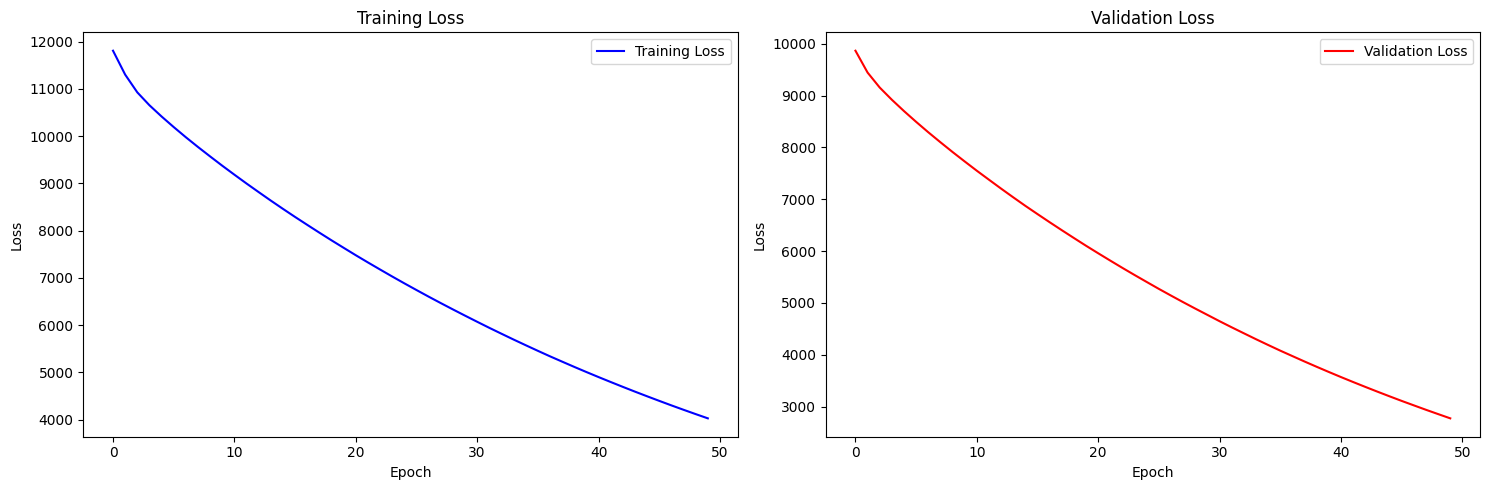

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 12015.6240 - mean_absolute_error: 106.0273 - mean_squared_error: 12015.6240 - val_loss: 10032.1631 - val_mean_absolute_error: 99.6808 - val_mean_squared_error: 10032.1631
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 11739.0771 - mean_absolute_error: 104.7189 - mean_squared_error: 11739.0771 - val_loss: 9622.4121 - val_mean_absolute_error: 97.5922 - val_mean_squared_error: 9622.4121
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 11056.6582 - mean_absolute_error: 101.3896 - mean_squared_error: 11056.6582 - val_loss: 9253.3125 - val_mean_absolute_error: 95.6740 - val_mean_squared_error: 9253.3125
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 10752.5449 - mean_absolute_error: 99.6357 - mean_squared_error: 10752.5449 - val_loss: 8989.9170 - val_mean_absolute_error: 94.2866 - val_mean_squared_error: 8989.9170
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 10448.2383 - mean_absolute_e

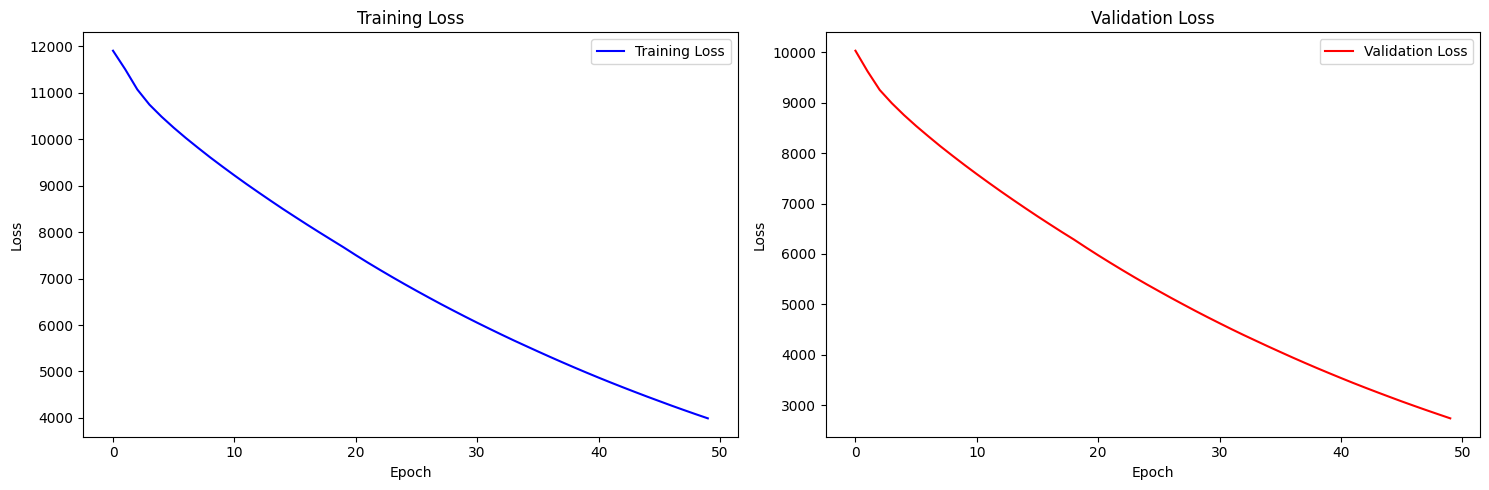

In [ ]:
#2 Lstm with 1 dense
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 11617.5156 - mean_absolute_error: 104.0513 - mean_squared_error: 11617.5156 - val_loss: 9993.9141 - val_mean_absolute_error: 99.4857 - val_mean_squared_error: 9993.9141
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 11871.3730 - mean_absolute_error: 105.2583 - mean_squared_error: 11871.3730 - val_loss: 9608.8066 - val_mean_absolute_error: 97.5318 - val_mean_squared_error: 9608.8066
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11128.2314 - mean_absolute_error: 101.5811 - mean_squared_error: 11128.2314 - val_loss: 9271.8691 - val_mean_absolute_error: 95.7899 - val_mean_squared_error: 9271.8691
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 10858.2695 - mean_absolute_error: 100.4464 - mean_squared_error: 10858.2695 - val_loss: 9016.0449 - val_mean_absolute_error: 94.4459 - val_mean_squared_error: 9016.0449
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 10796.5869 - mean_absolute_er

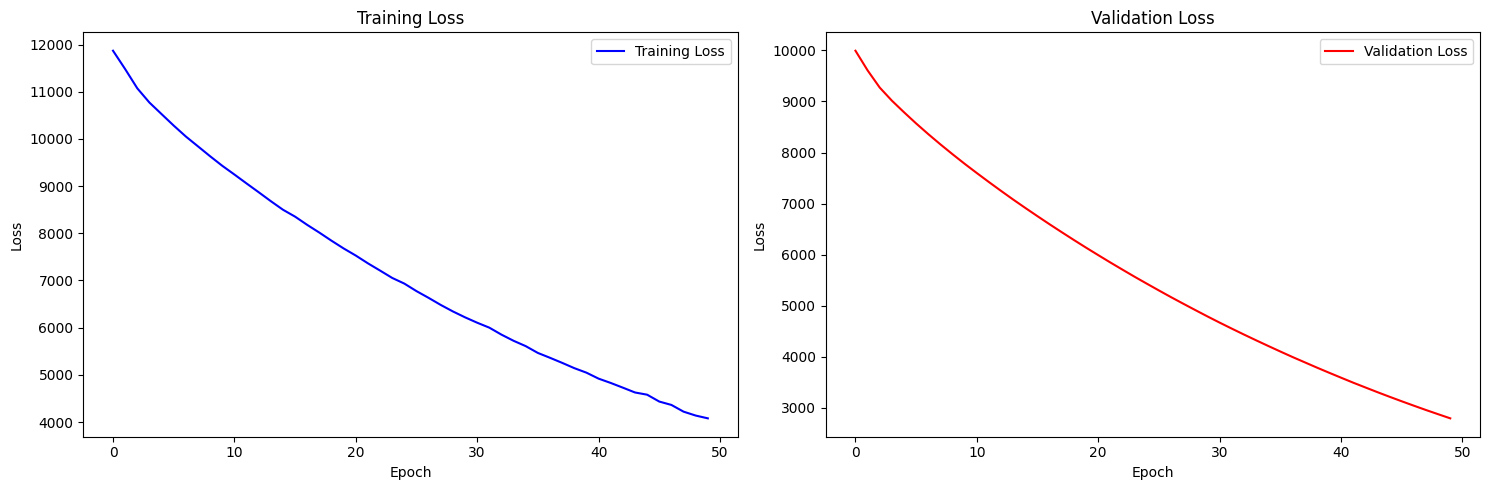

In [ ]:
# Define the model with Dropout layers
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 11843.6387 - mean_absolute_error: 105.0261 - mean_squared_error: 11843.6387 - val_loss: 9543.8652 - val_mean_absolute_error: 97.1925 - val_mean_squared_error: 9543.8652
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 10629.7754 - mean_absolute_error: 99.0533 - mean_squared_error: 10629.7754 - val_loss: 7642.7227 - val_mean_absolute_error: 86.8301 - val_mean_squared_error: 7642.7227
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8451.8486 - mean_absolute_error: 87.4628 - mean_squared_error: 8451.8486 - val_loss: 4509.1328 - val_mean_absolute_error: 66.3091 - val_mean_squared_error: 4509.1328
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4838.9077 - mean_absolute_error: 63.2161 - mean_squared_error: 4838.9077 - val_loss: 1252.5336 - val_mean_absolute_error: 33.5439 - val_mean_squared_error: 1252.5336
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1793.4304 - mean_absolute_error: 34.9960 - mean

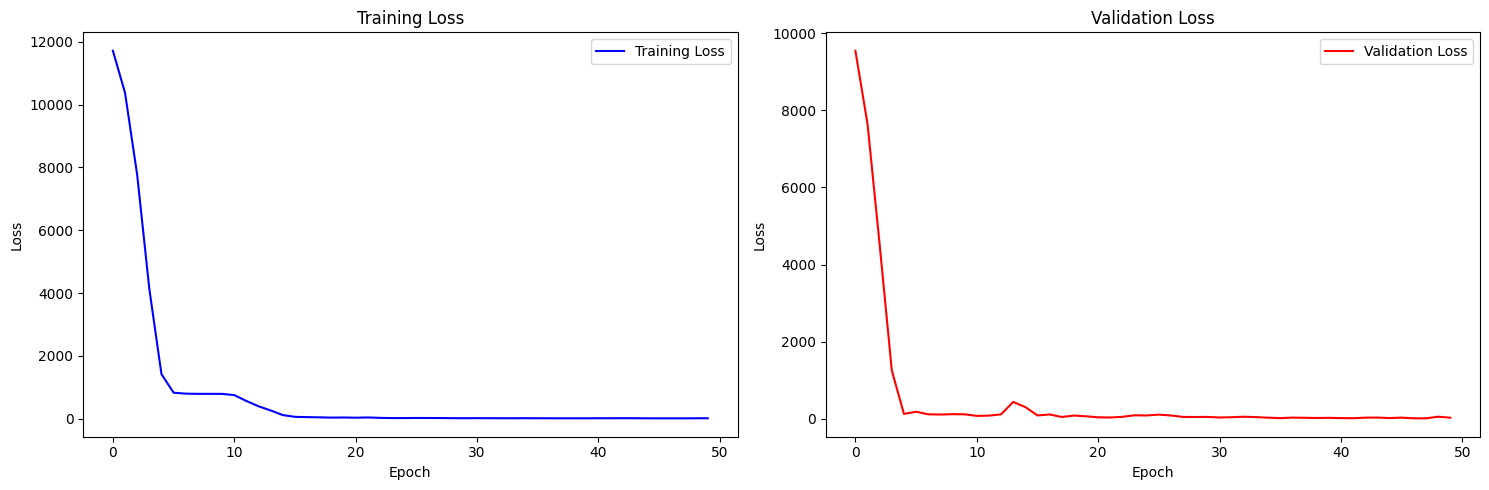

In [ ]:
# 2 lstm 3 dense
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 11604.6240 - mean_absolute_error: 104.0788 - mean_squared_error: 11604.6240 - val_loss: 9902.3887 - val_mean_absolute_error: 99.0251 - val_mean_squared_error: 9902.3887
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11487.1436 - mean_absolute_error: 103.5941 - mean_squared_error: 11487.1436 - val_loss: 9149.6240 - val_mean_absolute_error: 95.1403 - val_mean_squared_error: 9149.6240
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 10825.5957 - mean_absolute_error: 100.3416 - mean_squared_error: 10825.5957 - val_loss: 8212.5439 - val_mean_absolute_error: 90.0608 - val_mean_squared_error: 8212.5439
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 9583.7236 - mean_absolute_error: 93.9073 - mean_squared_error: 9583.7236 - val_loss: 7174.9634 - val_mean_absolute_error: 84.0644 - val_mean_squared_error: 7174.9634
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8390.4580 - mean_absolute_error:

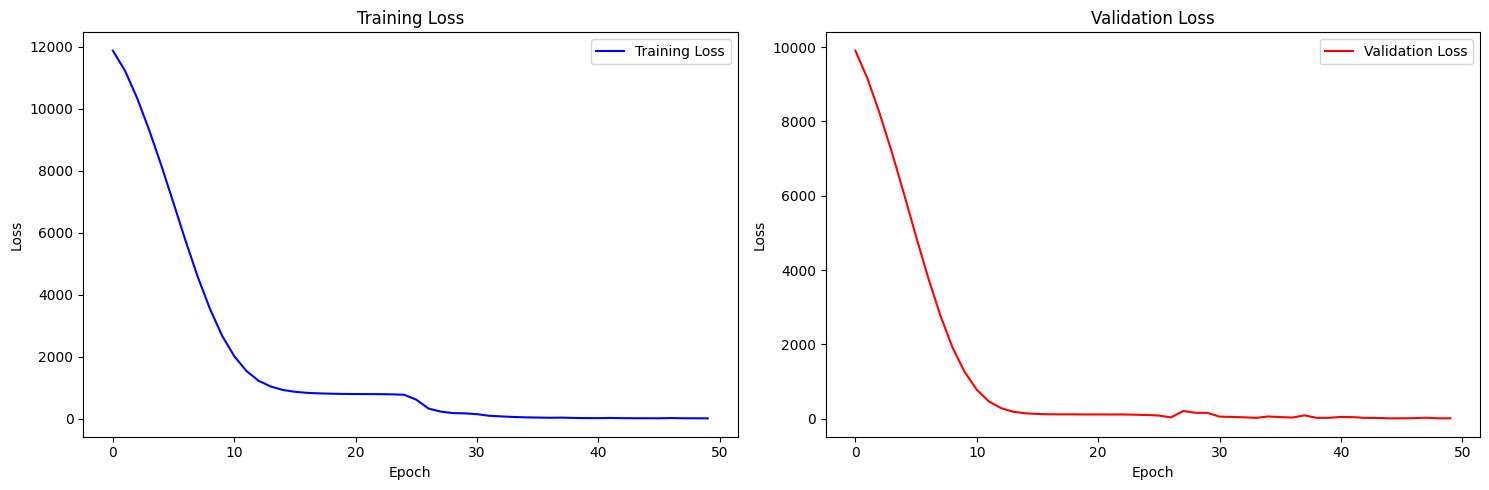

In [ ]:
# 2 lstm 2 dense
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 12291.6982 - mean_absolute_error: 107.2933 - mean_squared_error: 12291.6982 - val_loss: 10185.0332 - val_mean_absolute_error: 100.4319 - val_mean_squared_error: 10185.0332
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11876.5264 - mean_absolute_error: 105.2926 - mean_squared_error: 11876.5264 - val_loss: 9674.4424 - val_mean_absolute_error: 97.8197 - val_mean_squared_error: 9674.4424
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11314.6514 - mean_absolute_error: 102.4852 - mean_squared_error: 11314.6514 - val_loss: 8599.3896 - val_mean_absolute_error: 92.0458 - val_mean_squared_error: 8599.3896
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9904.9277 - mean_absolute_error: 95.1029 - mean_squared_error: 9904.9277 - val_loss: 6240.8413 - val_mean_absolute_error: 77.7652 - val_mean_squared_error: 6240.8413
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6746.1519 - mean_absolute_err

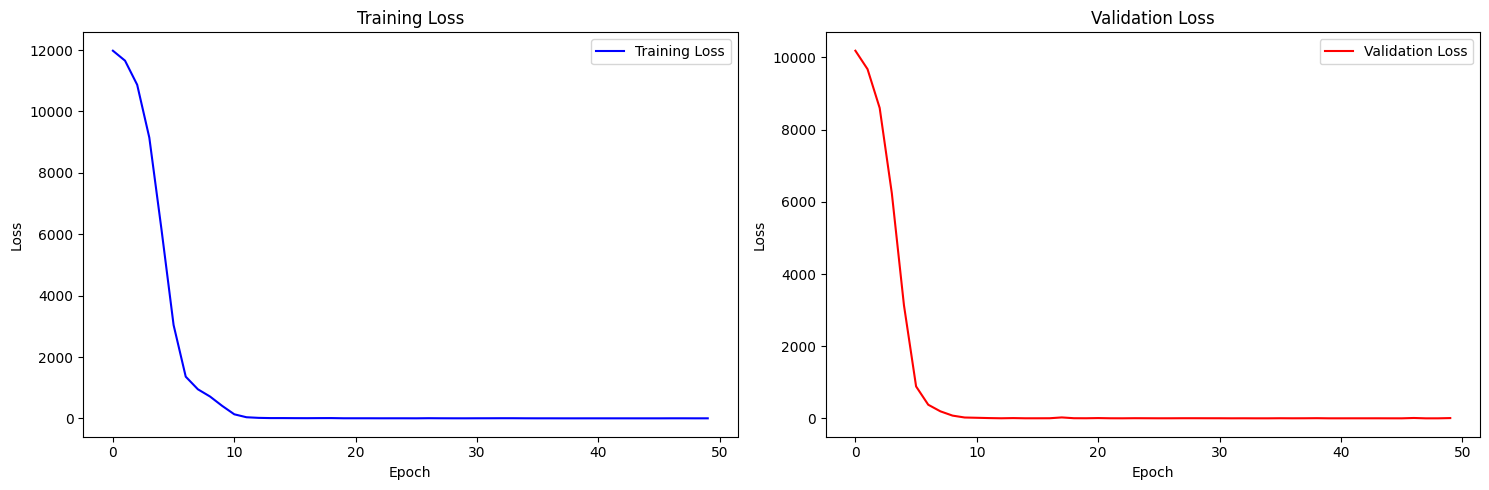

In [ ]:
model = Sequential([layers.Input((30, 4)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(y_train.shape[1])])
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 12075.6641 - mean_absolute_error: 106.1660 - mean_squared_error: 12075.6641 - val_loss: 10229.8643 - val_mean_absolute_error: 100.6652 - val_mean_squared_error: 10229.8643
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 11770.2021 - mean_absolute_error: 104.9384 - mean_squared_error: 11770.2021 - val_loss: 9420.9082 - val_mean_absolute_error: 96.5094 - val_mean_squared_error: 9420.9082
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 10609.6602 - mean_absolute_error: 98.8048 - mean_squared_error: 10609.6602 - val_loss: 7347.1743 - val_mean_absolute_error: 84.6732 - val_mean_squared_error: 7347.1743
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8106.4976 - mean_absolute_error: 84.4305 - mean_squared_error: 8106.4976 - val_loss: 3806.3164 - val_mean_absolute_error: 57.7727 - val_mean_squared_error: 3806.3164
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 4225.8125 - mean_absolute_erro

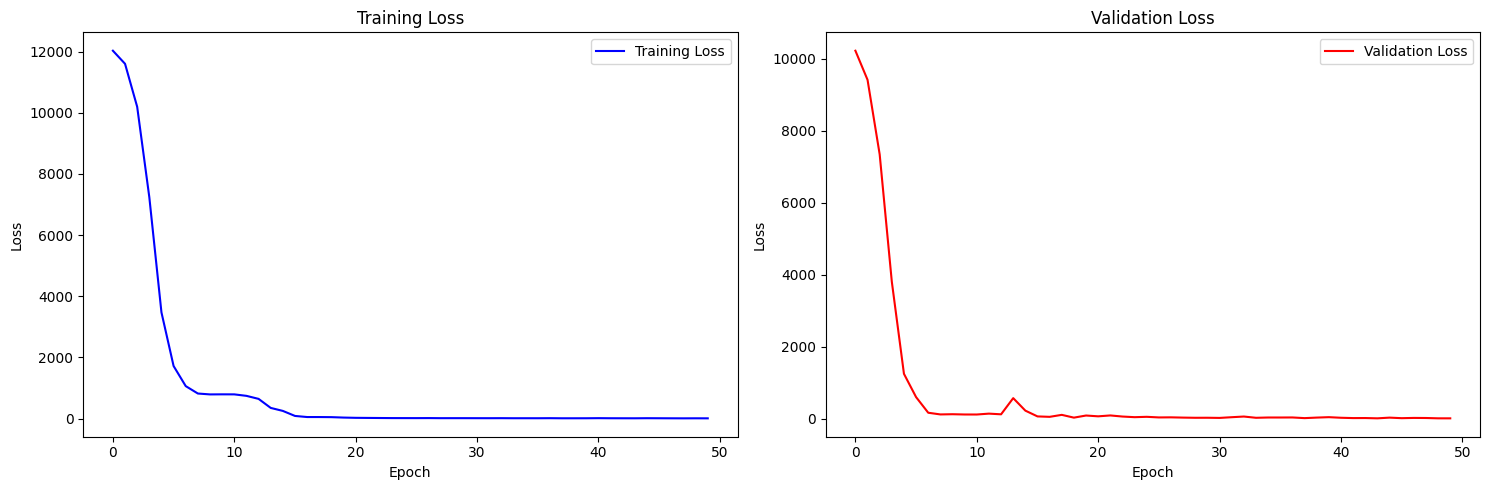

In [ ]:
#2 layer lstm  with 4 layer dense
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1])
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 11894.2197 - mean_absolute_error: 105.3077 - mean_squared_error: 11894.2197 - val_loss: 9906.8086 - val_mean_absolute_error: 99.0508 - val_mean_squared_error: 9906.8086
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11020.3477 - mean_absolute_error: 101.1146 - mean_squared_error: 11020.3477 - val_loss: 8423.4297 - val_mean_absolute_error: 91.1880 - val_mean_squared_error: 8423.4297
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 9554.7490 - mean_absolute_error: 93.3094 - mean_squared_error: 9554.7490 - val_loss: 5404.0986 - val_mean_absolute_error: 72.3077 - val_mean_squared_error: 5404.0986
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5855.7417 - mean_absolute_error: 69.7823 - mean_squared_error: 5855.7417 - val_loss: 1592.9291 - val_mean_absolute_error: 35.2191 - val_mean_squared_error: 1592.9291
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 2056.6118 - mean_absolute_erro

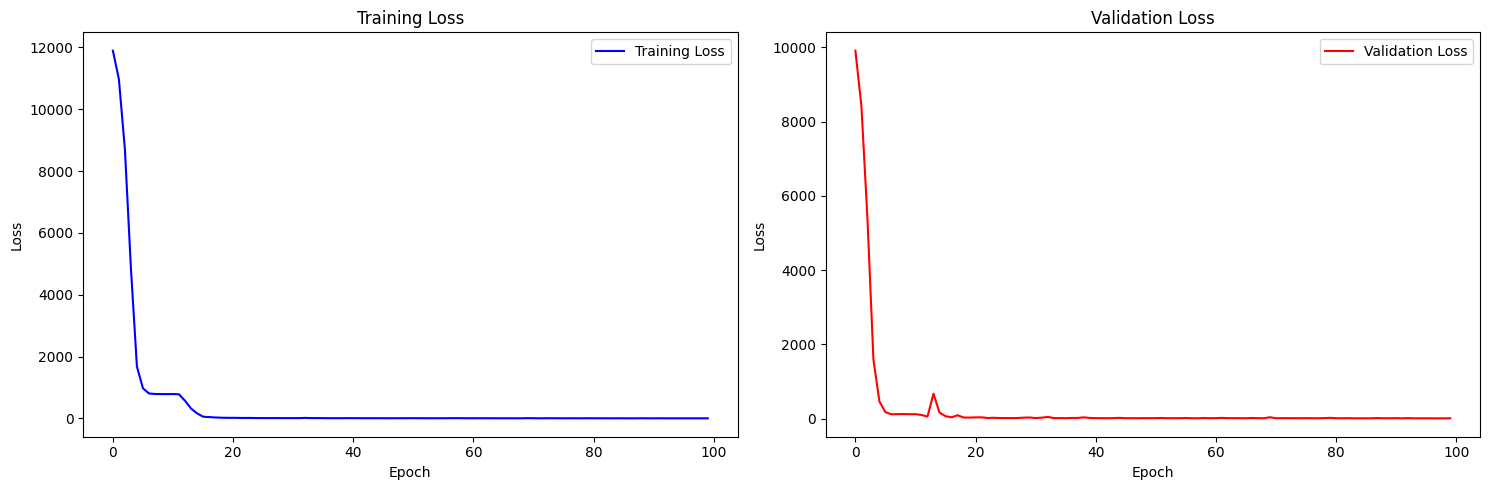

In [ ]:
#2 layer lstm  with 4 layer dense,100
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),  # First LSTM layer
    layers.LSTM(64, return_sequences=False),  # Second LSTM layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 12176.5801 - mean_absolute_error: 106.7846 - mean_squared_error: 12176.5801 - val_loss: 10007.7178 - val_mean_absolute_error: 99.5467 - val_mean_squared_error: 10007.7178
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 11491.7568 - mean_absolute_error: 103.3103 - mean_squared_error: 11491.7568 - val_loss: 8242.1377 - val_mean_absolute_error: 90.1271 - val_mean_squared_error: 8242.1377
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8656.9717 - mean_absolute_error: 88.5261 - mean_squared_error: 8656.9717 - val_loss: 4124.4087 - val_mean_absolute_error: 62.1785 - val_mean_squared_error: 4124.4087
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4170.5249 - mean_absolute_error: 56.1510 - mean_squared_error: 4170.5249 - val_loss: 627.2626 - val_mean_absolute_error: 21.1576 - val_mean_squared_error: 627.2626
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1257.9192 - mean_absolute_error: 29

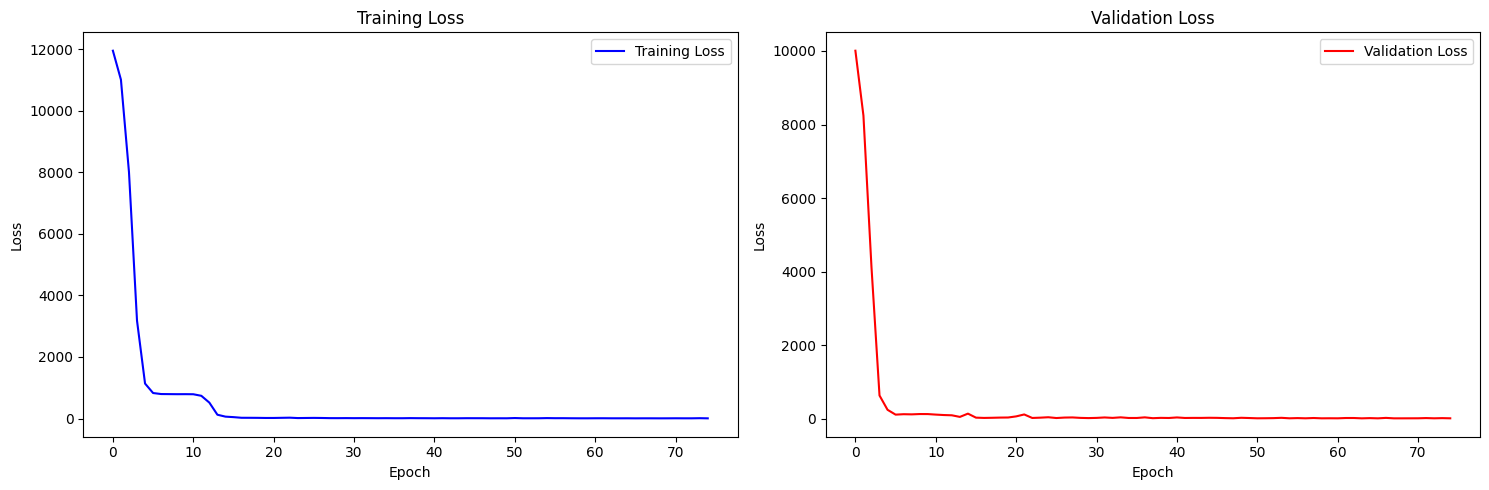

In [ ]:
#2 layer lstm  with 4 layer dense,75
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),  # First LSTM layer
    layers.LSTM(64, return_sequences=False),  # Second LSTM layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=75)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_79 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,012 (214.89 KB)

 Trainable params: 55,012 (214.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 11937.3301 - mean_absolute_error: 105.6345 - mean_squared_error: 11937.3301 - val_loss: 10342.2188 - val_mean_absolute_error: 101.2266 - val_mean_squared_error: 10342.2188
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 11654.3447 - mean_absolute_error: 104.2173 - mean_squared_error: 11654.3447 - val_loss: 9616.3594 - val_mean_absolute_error: 97.5686 - val_mean_squared_error: 9616.3594
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 10883.8389 - mean_absolute_error: 100.2461 - mean_squared_error: 10883.8389 - val_loss: 6585.3223 - val_mean_absolute_error: 80.4806 - val_mean_squared_error: 6585.3223
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6638.0229 - mean_absolute_error: 74.5390 - mean_squared_error: 6638.0229 - val_loss: 1018.0969 - val_mean_absolute_error: 28.9942 - val_mean_squared_error: 1018.0969
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 2768.1616 - mean_absolut

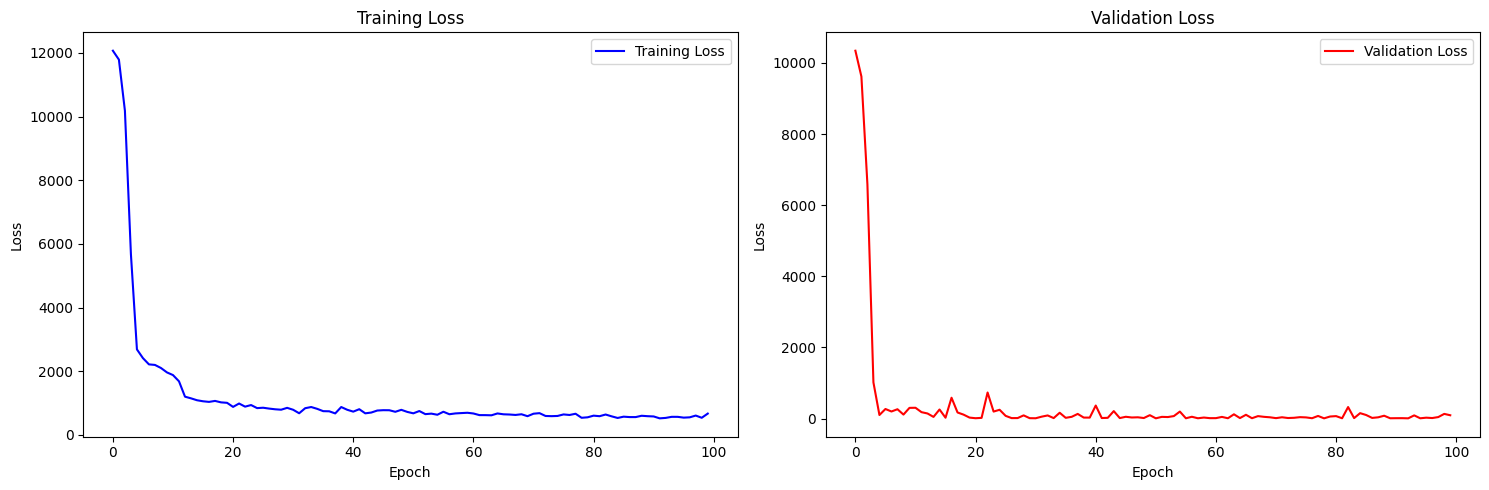

In [ ]:
#2 layer lstm  with 4 layer dense,100 : best , checking for overfitting and mitigatiing it, drop out
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),  # First LSTM layer
    layers.Dropout(0.2),  # Dropout after the first LSTM layer with 20% dropout rate
    layers.LSTM(64, return_sequences=False),  # Second LSTM layer
    layers.Dropout(0.2),  # Dropout after the second LSTM layer with 20% dropout rate
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dropout(0.3),  # Dropout after the first dense layer with 30% dropout rate
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dropout(0.3),  # Dropout after the second dense layer with 30% dropout rate
    layers.Dense(32, activation='relu'),  # Dense layer
    layers.Dropout(0.3),  # Dropout after the third dense layer with 30% dropout rate
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_80 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_81 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,012 (214.89 KB)

 Trainable params: 55,012 (214.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 11821.8467 - mean_absolute_error: 105.0844 - mean_squared_error: 11819.7637 - val_loss: 10061.3291 - val_mean_absolute_error: 99.7882 - val_mean_squared_error: 10059.4873
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 11526.4854 - mean_absolute_error: 103.5642 - mean_squared_error: 11524.6973 - val_loss: 8855.6895 - val_mean_absolute_error: 93.3133 - val_mean_squared_error: 8854.0312
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 9762.9492 - mean_absolute_error: 94.1529 - mean_squared_error: 9761.3154 - val_loss: 6075.4937 - val_mean_absolute_error: 75.5164 - val_mean_squared_error: 6073.9121
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6589.6802 - mean_absolute_error: 73.0138 - mean_squared_error: 6588.1021 - val_loss: 2382.6084 - val_mean_absolute_error: 38.1314 - val_mean_squared_error: 2381.0266
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2814.7202 - mean_absolute_er

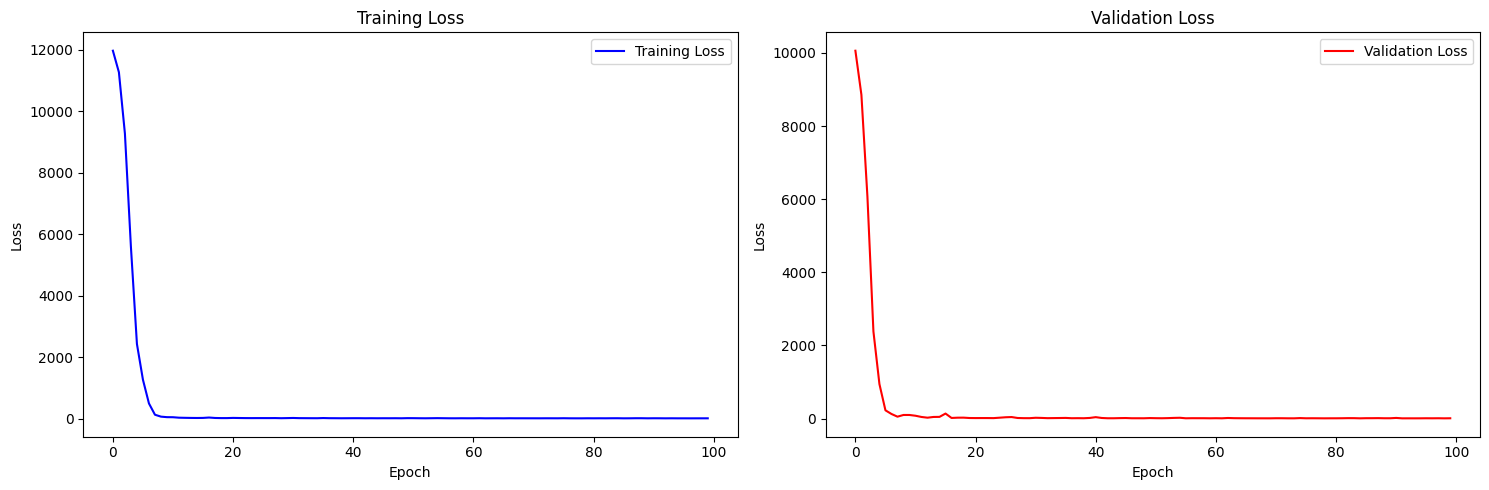

In [ ]:
#2 layer lstm  with 4 layer dense,100 : best , checking for overfitting and mitigatiing it, l2
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True, kernel_regularizer=l2(0.01)),  # LSTM layer with L2 regularization
    layers.LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)),  # LSTM layer with L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_82 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_83 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,012 (214.89 KB)

 Trainable params: 55,012 (214.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 12072.0264 - mean_absolute_error: 106.0166 - mean_squared_error: 12070.9990 - val_loss: 10327.8594 - val_mean_absolute_error: 101.1499 - val_mean_squared_error: 10326.9053
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 11899.7451 - mean_absolute_error: 105.4114 - mean_squared_error: 11898.8086 - val_loss: 9796.0781 - val_mean_absolute_error: 98.4780 - val_mean_squared_error: 9795.1855
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 10966.2285 - mean_absolute_error: 100.9961 - mean_squared_error: 10965.3428 - val_loss: 7928.3809 - val_mean_absolute_error: 88.4250 - val_mean_squared_error: 7927.5063
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8644.5283 - mean_absolute_error: 88.2168 - mean_squared_error: 8643.6514 - val_loss: 3651.9109 - val_mean_absolute_error: 58.9796 - val_mean_squared_error: 3651.0110
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 3766.6287 - mean_absolut

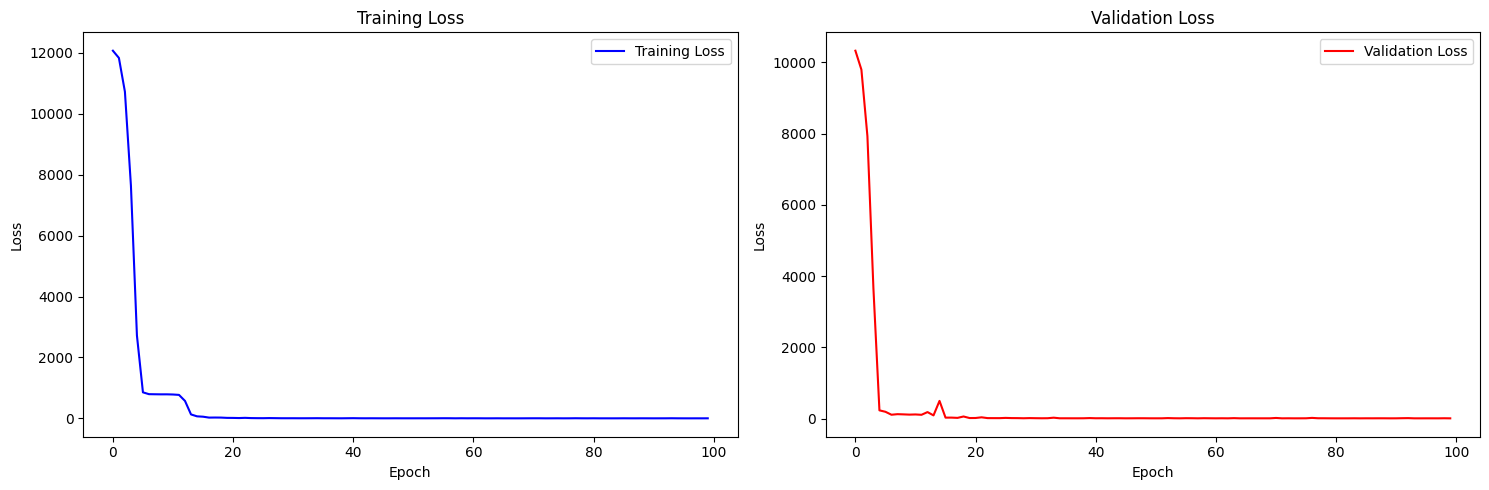

In [ ]:
#2 layer lstm  with 4 layer dense,100 : best , checking for overfitting and mitigatiing it, l2 only on dense

model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),  # First LSTM layer without L2 regularization
    layers.LSTM(64, return_sequences=False),  # Second LSTM layer without L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_84 (LSTM)                       │ (None, 30, 32)              │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_85 (LSTM)                       │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,356 (63.89 KB)

 Trainable params: 16,356 (63.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 12255.0996 - mean_absolute_error: 107.2158 - mean_squared_error: 12254.1572 - val_loss: 10238.1914 - val_mean_absolute_error: 100.7050 - val_mean_squared_error: 10237.3047
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 12100.7129 - mean_absolute_error: 106.5123 - mean_squared_error: 12099.8379 - val_loss: 9618.1309 - val_mean_absolute_error: 97.5679 - val_mean_squared_error: 9617.2910
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 11208.5840 - mean_absolute_error: 102.0809 - mean_squared_error: 11207.7490 - val_loss: 7659.0723 - val_mean_absolute_error: 86.8771 - val_mean_squared_error: 7658.2466
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8595.7725 - mean_absolute_error: 87.8027 - mean_squared_error: 8594.9434 - val_loss: 3610.7134 - val_mean_absolute_error: 58.7454 - val_mean_squared_error: 3609.8674
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3505.7366 - mean_absolut

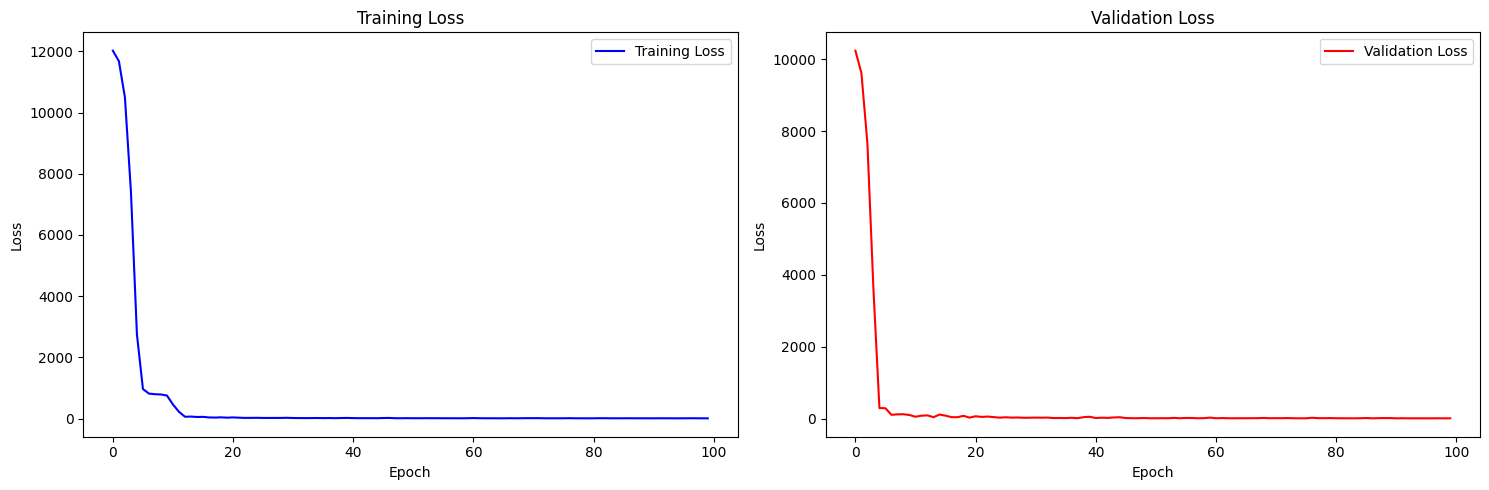

In [ ]:
#2 layer lstm  with 4 layer dense,100 : best , checking for overfitting and mitigating it, l2 only on dense, with 32 on lstm

model = Sequential([
    layers.LSTM(32, input_shape=(30, 4), return_sequences=True),  # Reduced LSTM layer
    layers.LSTM(32, return_sequences=False),  # Reduced LSTM layer
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(y_train.shape[1])  # Output layer (matching the output shape)
])

model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_86 (LSTM)                       │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_87 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,172 (203.80 KB)

 Trainable params: 52,172 (203.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 12037.0889 - mean_absolute_error: 105.8891 - mean_squared_error: 12036.5908 - val_loss: 10264.4482 - val_mean_absolute_error: 100.8164 - val_mean_squared_error: 10263.9688
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 11497.5332 - mean_absolute_error: 103.2623 - mean_squared_error: 11497.0576 - val_loss: 9881.5928 - val_mean_absolute_error: 98.7306 - val_mean_squared_error: 9881.1201
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 11375.9355 - mean_absolute_error: 102.5359 - mean_squared_error: 11375.4629 - val_loss: 9119.9072 - val_mean_absolute_error: 94.1949 - val_mean_squared_error: 9119.4229
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 10512.4463 - mean_absolute_error: 97.6436 - mean_squared_error: 10511.9580 - val_loss: 7809.5981 - val_mean_absolute_error: 85.0677 - val_mean_squared_error: 7809.0854
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8893.4805 - mean_absol

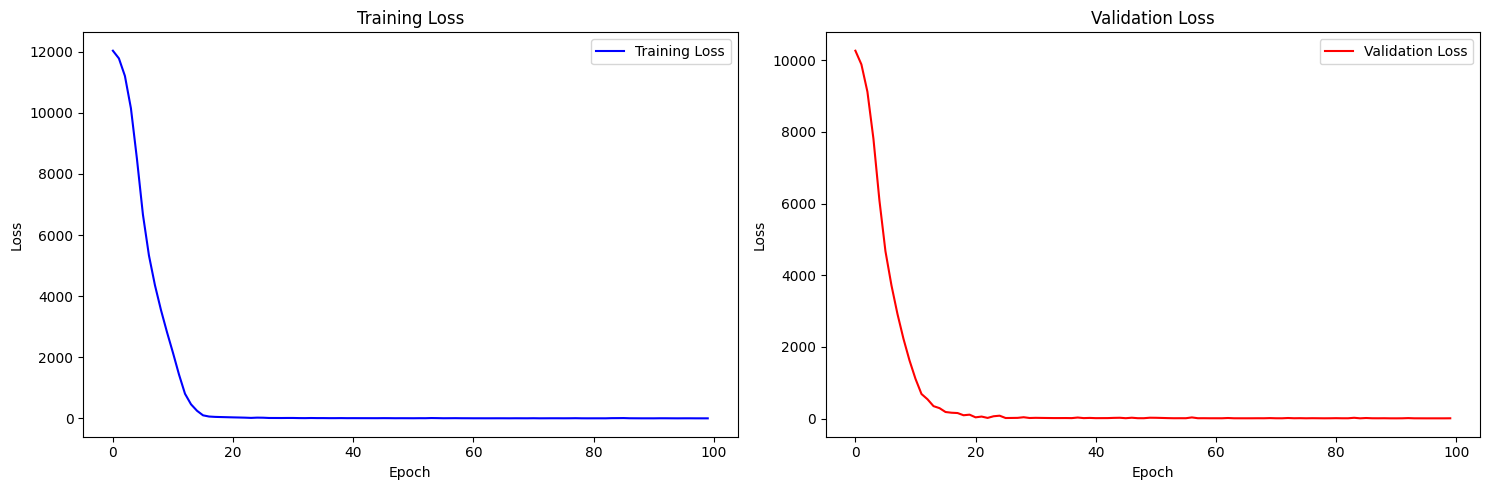

In [ ]:
#2 layer lstm  with 4 layer dense,100 : best , checking for overfitting and mitigatiing it, l2 only on dense, with 16 on dense coz we have lots of dense
model = Sequential([
    layers.LSTM(64, input_shape=(30, 4), return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced Dense layer
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # Reduced Dense layer
    layers.Dense(8, activation='relu', kernel_regularizer=l2(0.01)),  # Further reduced Dense layer
    layers.Dense(y_train.shape[1])
])

model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
print_metrics(history)
plot_training_validation_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Test MSE for Open: 2.8649535397180226
Test MAE for Open: 1.3425563927509676
Test MSE for High: 3.864622325660298
Test MAE for High: 1.5495413646855984
Test MSE for Low: 3.0549587995608207
Test MAE for Low: 1.3092929235342925
Test MSE for Close: 4.981640916985796
Test MAE for Close: 1.7909948452926236


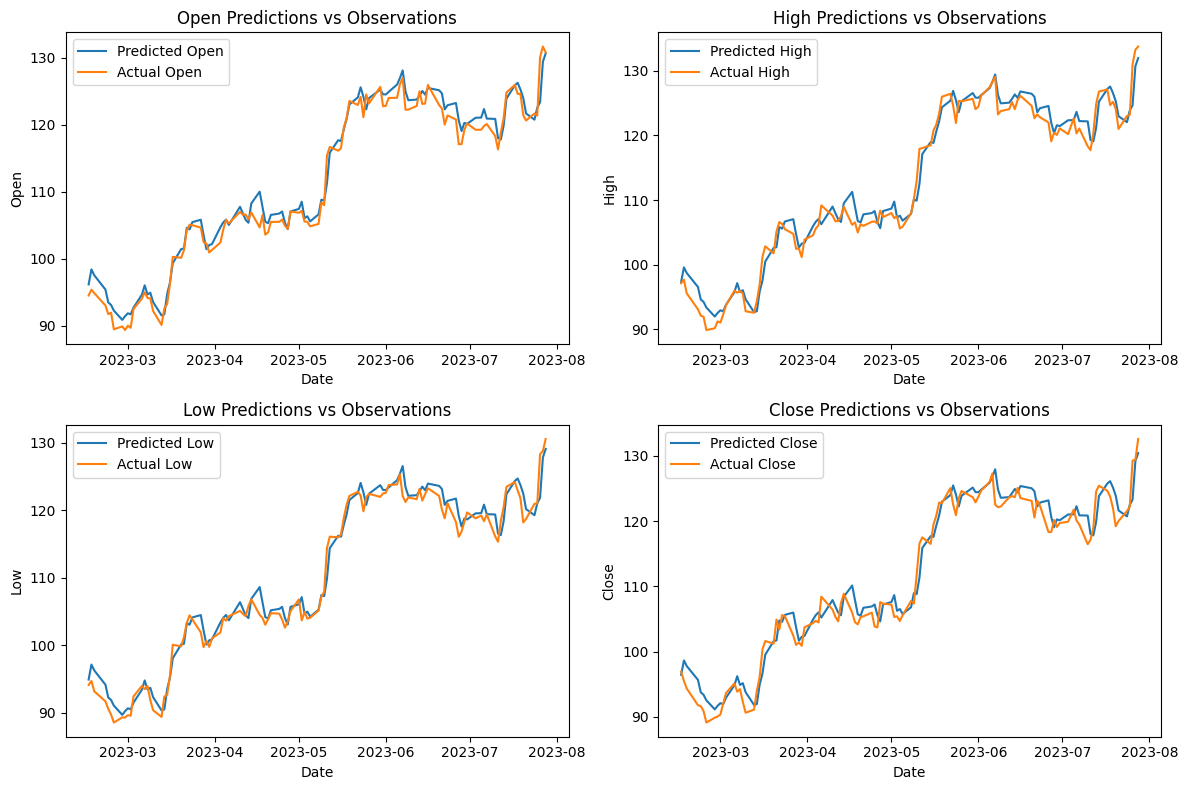

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


test_file_path = '/content/drive/My Drive/stock_model/test.csv'
test_data = pd.read_csv(test_file_path)

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y-%m-%d')
test_data.set_index('Date', inplace=True)
test_data.sort_index(inplace=True)
test_data = test_data[['Open', 'High', 'Low', 'Close']]


test_windowed_df = create_windowed_data(test_data)
test_dates, X_test, y_test = process_windowed_data(test_windowed_df)

test_predictions = model.predict(X_test)

columns = ['Open', 'High', 'Low', 'Close']
test_mse = mean_squared_error(y_test, test_predictions, multioutput='raw_values')
test_mae = mean_absolute_error(y_test, test_predictions, multioutput='raw_values')

for i, col in enumerate(columns):
    print(f"Test MSE for {col}: {test_mse[i]}")
    print(f"Test MAE for {col}: {test_mae[i]}")

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    ax[i//2, i%2].plot(test_dates, test_predictions[:, i], label=f'Predicted {col}')
    ax[i//2, i%2].plot(test_dates, y_test[:, i], label=f'Actual {col}')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'{col} Predictions vs Observations')
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel(col)

plt.tight_layout()
plt.show()


###  **3. Gated Recurrent Unit (GRU)**

In [21]:
def print_metrics(history):
    print("Training and Validation Metrics after all epochs:")
    print(f"Final Train MAE: {history.history['mean_absolute_error'][-1]}")
    print(f"Final Train MSE: {history.history['mean_squared_error'][-1]}")


    print(f"Final Validation MAE: {history.history['val_mean_absolute_error'][-1]}")
    print(f"Final Validation MSE: {history.history['val_mean_squared_error'][-1]}")



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 30, 64)              │          13,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 30, 64)              │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,572 (256.14 KB)

 Trainable params: 65,572 (256.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 11563.2480 - mean_absolute_error: 103.5976 - mean_squared_error: 11563.2480 - val_loss: 9317.9736 - val_mean_absolute_error: 96.0371 - val_mean_squared_error: 9317.9736
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 10791.3408 - mean_absolute_error: 99.9251 - mean_squared_error: 10791.3408 - val_loss: 8416.0273 - val_mean_absolute_error: 91.2155 - val_mean_squared_error: 8416.0273
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 9836.4541 - mean_absolute_error: 95.1195 - mean_squared_error: 9836.4541 - val_loss: 7392.6050 - val_mean_absolute_error: 85.4008 - val_mean_squared_error: 7392.6050
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 8525.2363 - mean_absolute_error: 87.8560 - mean_squared_error: 8525.2363 - val_loss: 6242.2524 - val_mean_absolute_error: 78.3367 - val_mean_squared_error: 6242.2524
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 7384.5234 - mean_absolute_error: 81

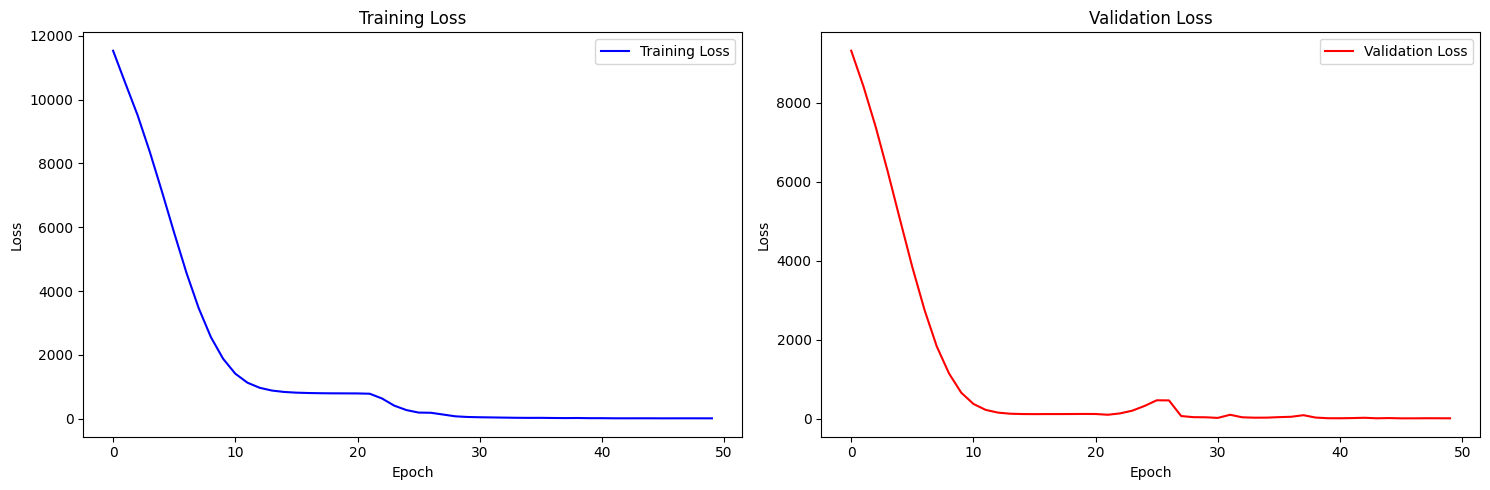

In [22]:
#starting with 3 GRU layer and 2 dense layers, 50 epochs
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),  # First GRU layer
    GRU(64, return_sequences=True),  # Second GRU layer
    GRU(64, return_sequences=False),  # Third GRU layer
    Dense(32, activation='relu'),  # Dense layer
    Dense(y_train.shape[1])  # Output layer
])


model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 30, 64)              │          13,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,668 (162.77 KB)

 Trainable params: 41,668 (162.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 12324.3818 - mean_absolute_error: 107.3511 - mean_squared_error: 12324.3818 - val_loss: 10031.4736 - val_mean_absolute_error: 99.6542 - val_mean_squared_error: 10031.4736
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 11913.8184 - mean_absolute_error: 105.4681 - mean_squared_error: 11913.8184 - val_loss: 9363.9131 - val_mean_absolute_error: 96.1521 - val_mean_squared_error: 9363.9131
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 10702.7773 - mean_absolute_error: 99.3120 - mean_squared_error: 10702.7773 - val_loss: 8174.2598 - val_mean_absolute_error: 89.5125 - val_mean_squared_error: 8174.2598
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9117.2861 - mean_absolute_error: 90.8022 - mean_squared_error: 9117.2861 - val_loss: 6351.0703 - val_mean_absolute_error: 78.1056 - val_mean_squared_error: 6351.0703
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7102.1235 - mean_absolute_error

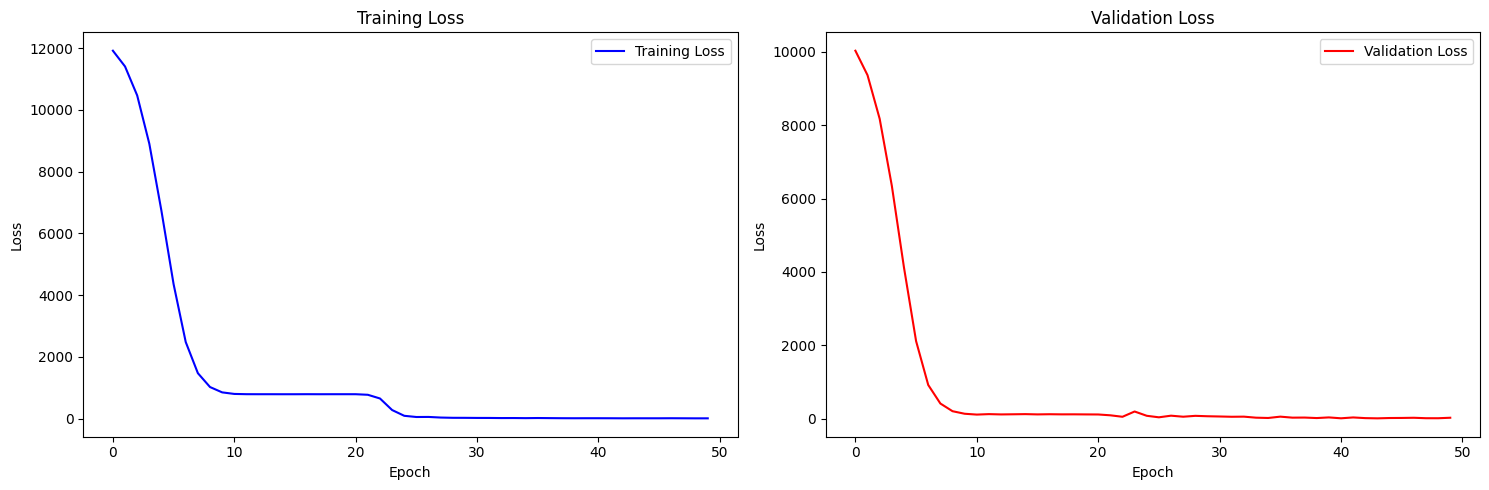

In [23]:
#starting with 2 GRU layer and 3 dense layers, 50 epochs
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),  # First GRU layer
    GRU(64, return_sequences=False),  # Second GRU layer
    Dense(32, activation='relu'),  # Dense layer
    Dense(32, activation='relu'),  # Dense layer
    Dense(y_train.shape[1])  # Output layer
])


model.summary()
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 12002.5742 - mean_absolute_error: 105.9276 - mean_squared_error: 12002.5742 - val_loss: 9630.6621 - val_mean_absolute_error: 97.6162 - val_mean_squared_error: 9630.6621
Epoch 2/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 10867.6309 - mean_absolute_error: 100.3089 - mean_squared_error: 10867.6309 - val_loss: 8393.5811 - val_mean_absolute_error: 90.8869 - val_mean_squared_error: 8393.5811
Epoch 3/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9412.8740 - mean_absolute_error: 92.6717 - mean_squared_error: 9412.8740 - val_loss: 6253.0859 - val_mean_absolute_error: 77.7163 - val_mean_squared_error: 6253.0859
Epoch 4/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 6815.3032 - mean_absolute_error: 76.4070 - mean_squared_error: 6815.3032 - val_loss: 3392.6582 - val_mean_absolute_error: 54.8801 - val_mean_squared_error: 3392.6582
Epoch 5/75
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3794.6765 - mean_absolute_error: 5

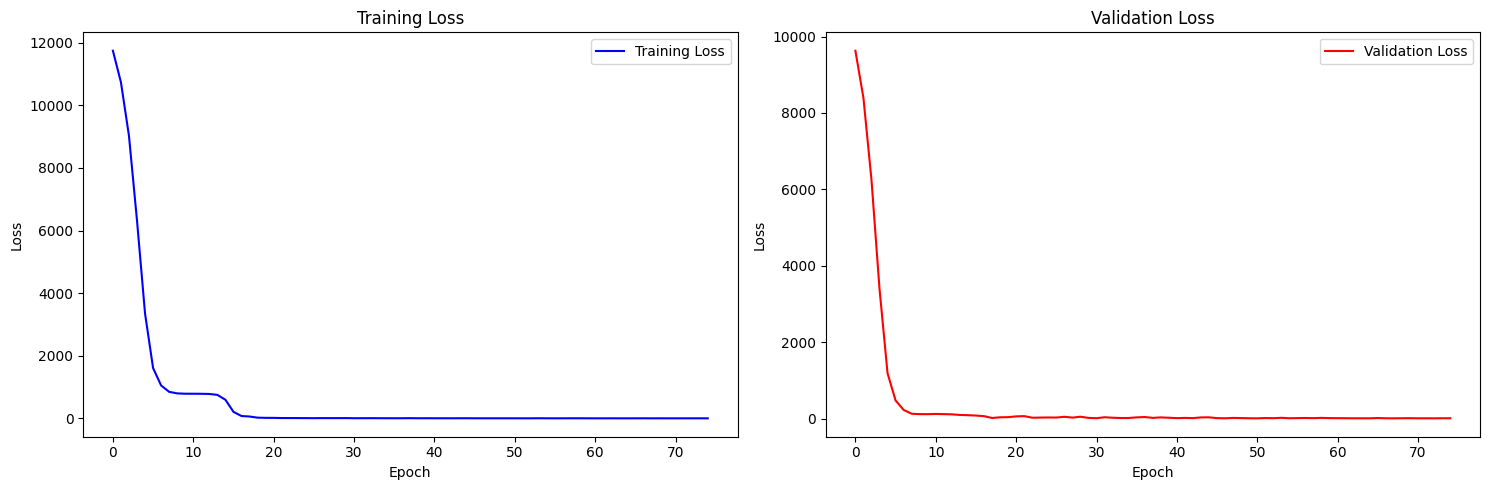

In [24]:
#starting with 2 GRU layer and 3 dense layers, 75 epochs
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),  # First GRU layer
    GRU(64, return_sequences=False),  # Second GRU layer
    Dense(32, activation='relu'),  # Dense layer
    Dense(32, activation='relu'),  # Dense layer
    Dense(y_train.shape[1])  # Output layer
])

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=75)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 11912.2559 - mean_absolute_error: 105.6061 - mean_squared_error: 11912.2559 - val_loss: 9718.6934 - val_mean_absolute_error: 98.0957 - val_mean_squared_error: 9718.6934
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 11057.0801 - mean_absolute_error: 101.6651 - mean_squared_error: 11057.0801 - val_loss: 8401.9893 - val_mean_absolute_error: 91.1205 - val_mean_squared_error: 8401.9893
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 9252.5029 - mean_absolute_error: 91.8403 - mean_squared_error: 9252.5029 - val_loss: 5946.5815 - val_mean_absolute_error: 76.3829 - val_mean_squared_error: 5946.5815
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 6743.7505 - mean_absolute_error: 76.0355 - mean_squared_error: 6743.7505 - val_loss: 2576.0115 - val_mean_absolute_error: 49.1393 - val_mean_squared_error: 2576.0115
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3231.6123 - mean_absolute_error: 48

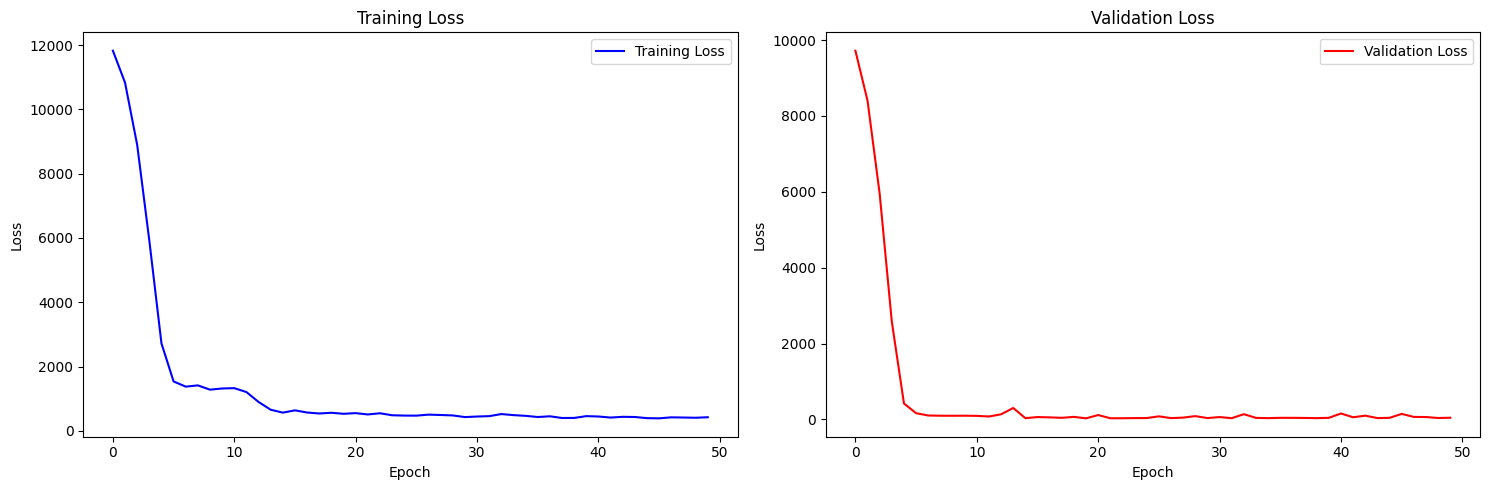

In [25]:
#tarting with 2 GRU layer and 3 dense layers, 50 epochs, dropout
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),  # First GRU layer
    Dropout(0.2),  # Dropout after the first GRU layer
    GRU(64, return_sequences=False),  # Second GRU layer
    Dropout(0.2),  # Dropout after the second GRU layer
    Dense(32, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout after first Dense layer
    Dense(32, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout after second Dense layer
    Dense(y_train.shape[1])  # Output layer
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 12002.4434 - mean_absolute_error: 105.7395 - mean_squared_error: 12002.4434 - val_loss: 10014.4014 - val_mean_absolute_error: 99.5673 - val_mean_squared_error: 10014.4014
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 11619.4717 - mean_absolute_error: 103.8703 - mean_squared_error: 11619.4717 - val_loss: 9392.3691 - val_mean_absolute_error: 96.3473 - val_mean_squared_error: 9392.3691
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 10939.7080 - mean_absolute_error: 100.4686 - mean_squared_error: 10939.7080 - val_loss: 8343.7314 - val_mean_absolute_error: 90.6796 - val_mean_squared_error: 8343.7314
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9504.0137 - mean_absolute_error: 92.9537 - mean_squared_error: 9504.0137 - val_loss: 6586.2070 - val_mean_absolute_error: 80.2157 - val_mean_squared_error: 6586.2070
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7544.0063 - mean_absolute_erro

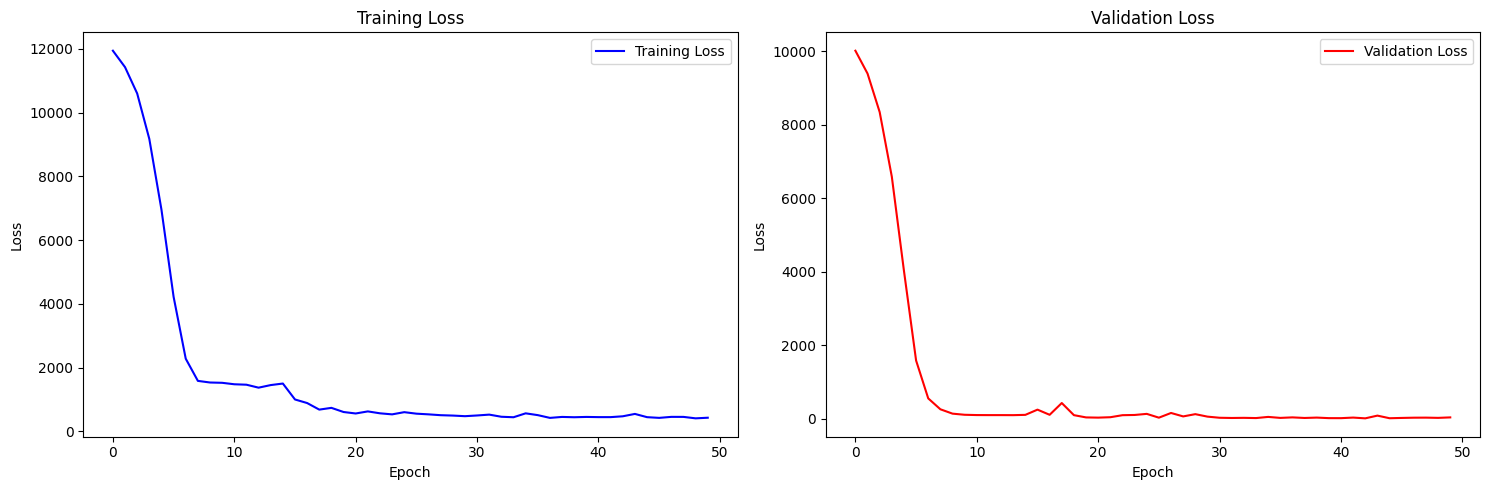

In [26]:
#tarting with 2 GRU layer and 3 dense layers, 50 epochs, dropout
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),  # First GRU layer
    GRU(64, return_sequences=False),  # Second GRU layer
    Dense(32, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout after first Dense layer
    Dense(32, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout after second Dense layer
    Dense(y_train.shape[1])  # Output layer
])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 12090.2158 - mean_absolute_error: 106.2475 - mean_squared_error: 12089.5049 - val_loss: 10097.1035 - val_mean_absolute_error: 100.0071 - val_mean_squared_error: 10096.4414
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 11858.6963 - mean_absolute_error: 105.2797 - mean_squared_error: 11858.0449 - val_loss: 9407.3887 - val_mean_absolute_error: 96.4866 - val_mean_squared_error: 9406.7617
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 10966.0352 - mean_absolute_error: 100.9095 - mean_squared_error: 10965.4131 - val_loss: 8312.7139 - val_mean_absolute_error: 90.5792 - val_mean_squared_error: 8312.0977
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 9164.7275 - mean_absolute_error: 91.3888 - mean_squared_error: 9164.1104 - val_loss: 6544.2310 - val_mean_absolute_error: 79.9784 - val_mean_squared_error: 6543.6006
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 7578.0029 - mean_absolute_err

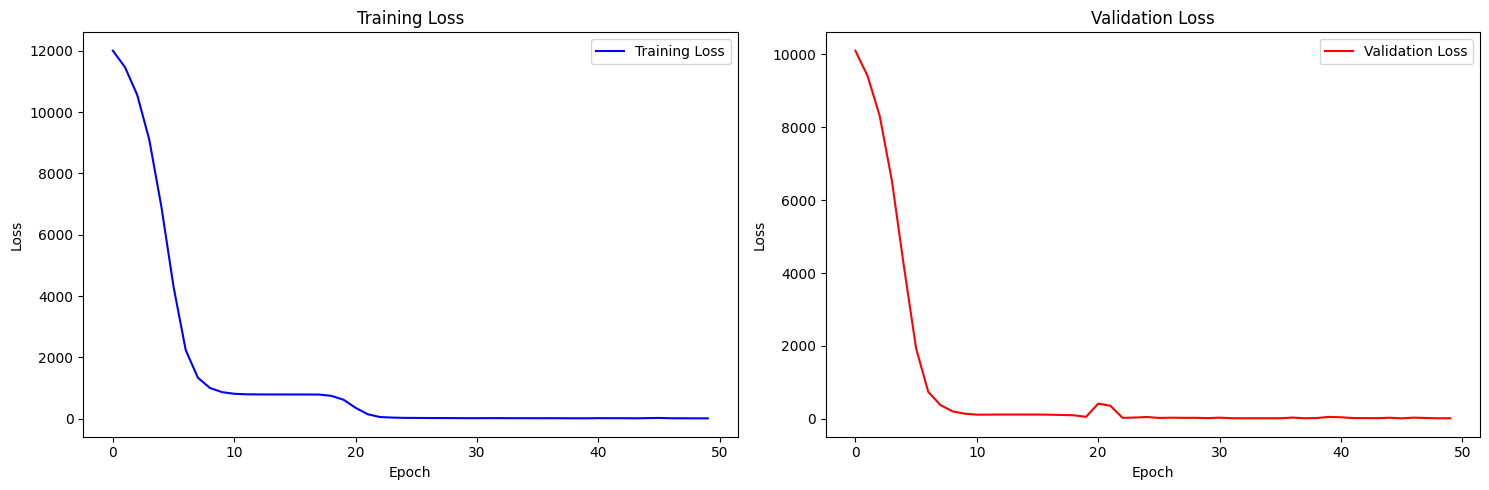

In [27]:
#training with 2 GRU layer and 3 dense layers, 50 epochs, regularization on dense
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True),
    GRU(64, return_sequences=False),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # First Dense layer with L2 regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Second Dense layer with L2 regularization
    Dense(y_train.shape[1])  # Output layer
])


model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 11896.9863 - mean_absolute_error: 105.3807 - mean_squared_error: 11896.1182 - val_loss: 10398.6924 - val_mean_absolute_error: 101.4999 - val_mean_squared_error: 10397.9023
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 12048.0039 - mean_absolute_error: 106.1350 - mean_squared_error: 12047.2354 - val_loss: 10377.4062 - val_mean_absolute_error: 101.3957 - val_mean_squared_error: 10376.6982
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 12140.4473 - mean_absolute_error: 106.5492 - mean_squared_error: 12139.7568 - val_loss: 10327.7617 - val_mean_absolute_error: 101.1511 - val_mean_squared_error: 10327.1133
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 11725.9922 - mean_absolute_error: 104.3923 - mean_squared_error: 11725.3555 - val_loss: 10221.7744 - val_mean_absolute_error: 100.6241 - val_mean_squared_error: 10221.1602
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 11838.9287 - mean

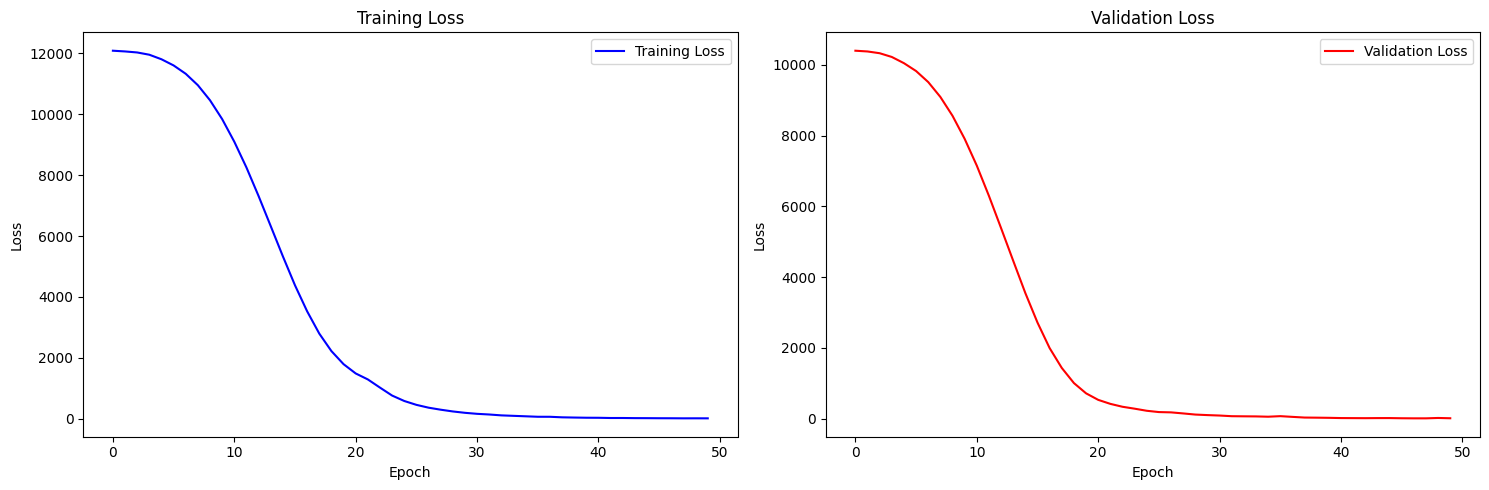

In [28]:
#tarting with 2 GRU layer and 3 dense layers, 50 epochs, regularization, batch sizes
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(32, return_sequences=True, kernel_regularizer=l2(0.01)),  # First GRU with L2 regularization
    GRU(32, return_sequences=False, kernel_regularizer=l2(0.01)),  # Second GRU with L2 regularization
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),  # First Dense layer with L2 regularization
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),  # Second Dense layer with L2 regularization
    Dense(y_train.shape[1])  # Output layer
])


model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 11944.7344 - mean_absolute_error: 105.8000 - mean_squared_error: 11942.9883 - val_loss: 9838.6562 - val_mean_absolute_error: 98.6948 - val_mean_squared_error: 9837.0488
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 11352.0410 - mean_absolute_error: 102.7029 - mean_squared_error: 11350.4619 - val_loss: 8558.7744 - val_mean_absolute_error: 91.9581 - val_mean_squared_error: 8557.2559
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9360.4521 - mean_absolute_error: 92.3809 - mean_squared_error: 9358.9424 - val_loss: 6040.3013 - val_mean_absolute_error: 76.9495 - val_mean_squared_error: 6038.8105
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 6263.8823 - mean_absolute_error: 73.7437 - mean_squared_error: 6262.3887 - val_loss: 2603.9666 - val_mean_absolute_error: 49.4081 - val_mean_squared_error: 2602.4504
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2939.2385 - mean_absolute_error: 46

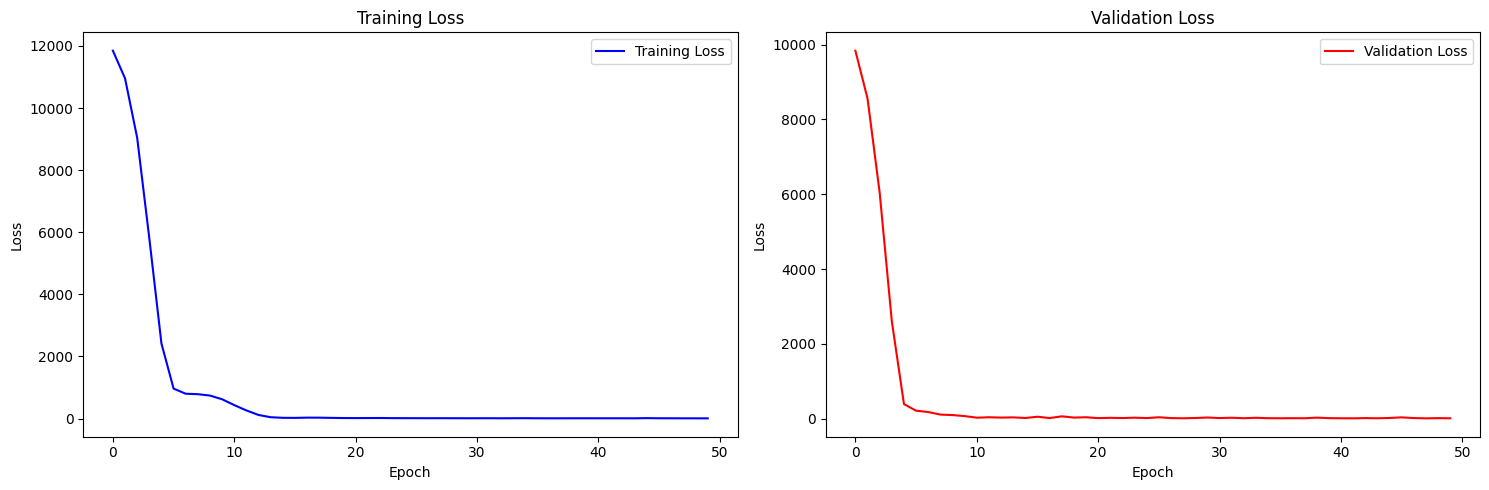

In [29]:
#tarting with 2 GRU layer and 3 dense layers, 50 epochs, regularization
model = Sequential([
    Input(shape=(30, 4)),  # Explicit Input layer
    GRU(64, return_sequences=True, kernel_regularizer=l2(0.01)),  # First GRU with L2 regularization
    GRU(64, return_sequences=False, kernel_regularizer=l2(0.01)),  # Second GRU with L2 regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # First Dense layer with L2 regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Second Dense layer with L2 regularization
    Dense(y_train.shape[1])  # Output layer
])


model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error', 'mean_squared_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)
print_metrics(history)
plot_training_validation_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step
Test MSE for Open: 3.2618238566961244
Test MAE for Open: 1.4643941334304125
Test MSE for High: 4.190590460925057
Test MAE for High: 1.677458917108856
Test MSE for Low: 3.4198703816550573
Test MAE for Low: 1.4049607255470486
Test MSE for Close: 5.322943190225154
Test MAE for Close: 1.8638436980563822


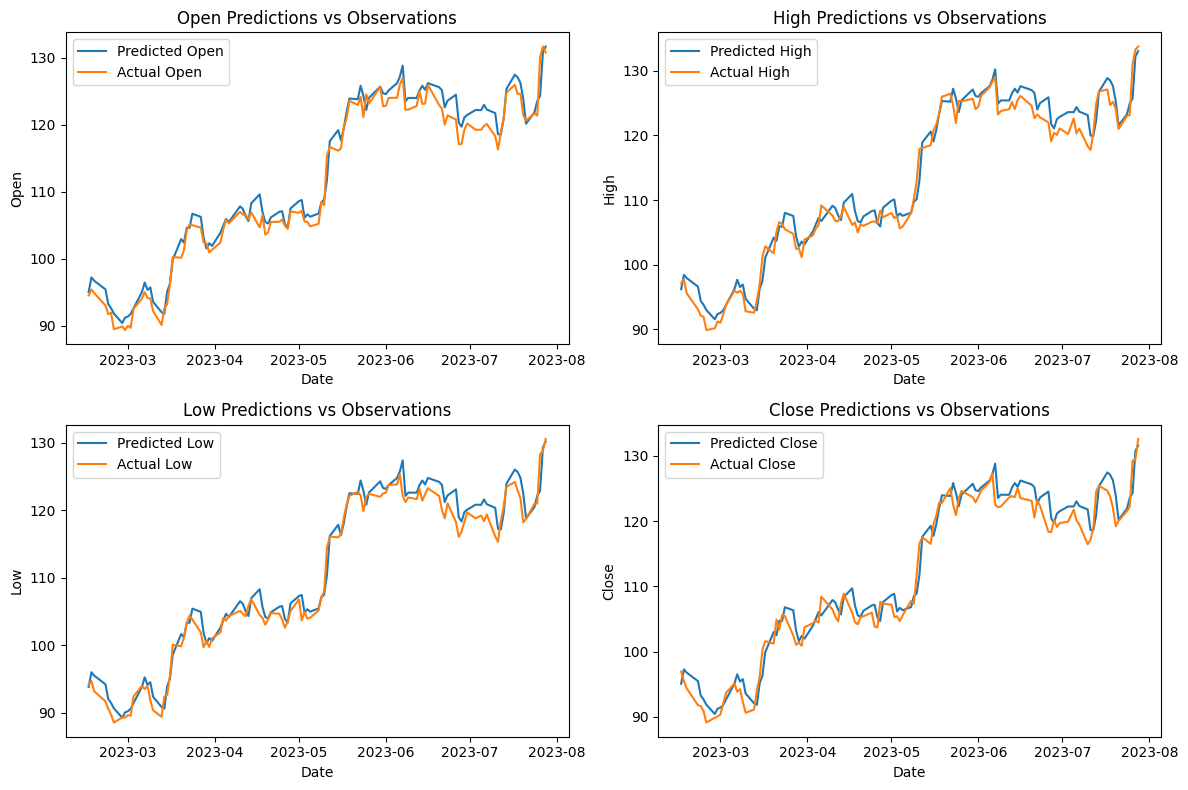

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load test data
test_file_path = '/content/drive/My Drive/stock_model/test.csv'
test_data = pd.read_csv(test_file_path)

test_data['Date'] = pd.to_datetime(test_data['Date'], format='%Y-%m-%d')
test_data.set_index('Date', inplace=True)
test_data.sort_index(inplace=True)
test_data = test_data[['Open', 'High', 'Low', 'Close']]


test_windowed_df = create_windowed_data(test_data)
test_dates, X_test, y_test = process_windowed_data(test_windowed_df)

test_predictions = model.predict(X_test)

columns = ['Open', 'High', 'Low', 'Close']
test_mse = mean_squared_error(y_test, test_predictions, multioutput='raw_values')
test_mae = mean_absolute_error(y_test, test_predictions, multioutput='raw_values')

for i, col in enumerate(columns):
    print(f"Test MSE for {col}: {test_mse[i]}")
    print(f"Test MAE for {col}: {test_mae[i]}")

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    ax[i//2, i%2].plot(test_dates, test_predictions[:, i], label=f'Predicted {col}')
    ax[i//2, i%2].plot(test_dates, y_test[:, i], label=f'Actual {col}')
    ax[i//2, i%2].legend()
    ax[i//2, i%2].set_title(f'{col} Predictions vs Observations')
    ax[i//2, i%2].set_xlabel('Date')
    ax[i//2, i%2].set_ylabel(col)

plt.tight_layout()
plt.show()
